# Algoritmos de Diferença Temporal: SARSA, Q-Learning e Expected SARSA

## Implementação no Ambiente Cliff Walking

## 1. Introdução Teórica

### 1.1 Métodos de Diferença Temporal (TD)

Os métodos de Diferença Temporal combinam ideias de **Programação Dinâmica** e **Monte Carlo**:
- Como DP: fazem *bootstrapping* (estimam valores usando outras estimativas)
- Como MC: aprendem diretamente da experiência (model-free)

A equação básica de atualização TD é:

$$V(S_t) \leftarrow V(S_t) + \alpha [R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$$

Onde:
- $\alpha$ é a taxa de aprendizado (learning rate)
- $\gamma$ é o fator de desconto (discount factor)
- $R_{t+1}$ é a recompensa recebida
- O termo $[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)]$ é chamado de **erro TD**

---

### 1.2 SARSA (State-Action-Reward-State-Action)

**SARSA** é um algoritmo **on-policy** que aprende a função $Q(s,a)$ enquanto segue a política atual.

#### Equação de Atualização:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$$

**Características:**
- **On-policy**: aprende sobre a política que está seguindo
- **Cauteloso**: considera a exploração na atualização
- **Seguro**: aprende políticas mais conservadoras em ambientes com riscos
- Usa a ação $A_{t+1}$ que será **efetivamente tomada**

#### Pseudocódigo:

```
Inicializar Q(s,a) arbitrariamente, ∀s ∈ S, a ∈ A
Parâmetros: α, γ, ε

Para cada episódio:
    Inicializar S
    Escolher A de S usando política ε-greedy derivada de Q
    
    Para cada passo do episódio:
        Executar ação A, observar R, S'
        Escolher A' de S' usando política ε-greedy derivada de Q
        Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
        S ← S'; A ← A'
    Até S ser terminal
```

---

### 1.3 Q-Learning

**Q-Learning** é um algoritmo **off-policy** que aprende a política ótima independentemente da política sendo seguida.

#### Equação de Atualização:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$$

**Características:**
- **Off-policy**: aprende $Q^*$ independente da política de comportamento
- **Otimista**: assume que agirá otimamente no futuro
- **Agressivo**: pode aprender políticas arriscadas
- Usa $\max_a Q(S_{t+1}, a)$ ao invés da ação escolhida

#### Pseudocódigo:

```
Inicializar Q(s,a) arbitrariamente, ∀s ∈ S, a ∈ A
Parâmetros: α, γ, ε

Para cada episódio:
    Inicializar S
    
    Para cada passo do episódio:
        Escolher A de S usando política ε-greedy derivada de Q
        Executar ação A, observar R, S'
        Q(S,A) ← Q(S,A) + α[R + γ max_a Q(S',a) - Q(S,A)]
        S ← S'
    Até S ser terminal
```

---

### 1.4 Expected SARSA

**Expected SARSA** usa a **expectativa** sobre todas as ações possíveis ao invés de uma única amostra.

#### Equação de Atualização:

$$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \sum_a \pi(a|S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t)]$$

Onde $\pi(a|S_{t+1})$ é a probabilidade de escolher a ação $a$ no estado $S_{t+1}$ sob a política $\pi$.

**Características:**
- **Elimina variância** da seleção aleatória de ações
- **Mais estável** que SARSA
- **Subsume Q-Learning**: quando $\pi$ é greedy, Expected SARSA = Q-Learning
- **Melhor performance geral** na maioria dos casos

#### Probabilidades para política ε-greedy:

$$\pi(a|s) = \begin{cases} 
1 - \epsilon + \frac{\epsilon}{|A|} & \text{se } a = \arg\max_{a'} Q(s,a') \\
\frac{\epsilon}{|A|} & \text{caso contrário}
\end{cases}$$

#### Pseudocódigo:

```
Inicializar Q(s,a) arbitrariamente, ∀s ∈ S, a ∈ A
Parâmetros: α, γ, ε

Para cada episódio:
    Inicializar S
    
    Para cada passo do episódio:
        Escolher A de S usando política ε-greedy derivada de Q
        Executar ação A, observar R, S'
        E ← Σ_a π(a|S') Q(S',a)  # Calcular expectativa
        Q(S,A) ← Q(S,A) + α[R + γE - Q(S,A)]
        S ← S'
    Até S ser terminal
```

---

### 1.5 Comparação dos Três Algoritmos

| Aspecto | SARSA | Q-Learning | Expected SARSA |
|---------|-------|------------|----------------|
| **Tipo** | On-policy | Off-policy | Ambos |
| **Atualização** | Usa $A'$ escolhida | Usa $\max_a Q(S',a)$ | Usa $\mathbb{E}[Q(S',A')]$ |
| **Variância** | Alta | Média | Baixa |
| **Convergência** | $Q^\pi$ | $Q^*$ | Flexível |
| **Segurança** | Alta | Baixa | Média |
| **Performance** | Boa | Boa | Excelente |
| **Custo Comp.** | O(1) | O(\|A\|) | O(\|A\|) |

---

### 1.6 O Ambiente Cliff Walking

O **Cliff Walking** é um ambiente clássico para testar algoritmos TD:

```
┌─────────────────────┐
│ S □ □ □ ... □ □ □ G │  ← Linha superior (caminho seguro)
├─────────────────────┤
│ █ █ █ █ ... █ █ █ █ │  ← Precipício (cliff)
└─────────────────────┘
```

**Características:**
- **S**: Estado inicial (canto inferior esquerdo)
- **G**: Estado objetivo (canto inferior direito)
- **█**: Precipício (cliff) - penalidade de -100
- **□**: Estados normais - penalidade de -1 por movimento
- **Ações**: ↑ (up), ↓ (down), ← (left), → (right)
- **Tamanho**: Grid 4×12 (48 estados)

**Comportamento Esperado:**
- **SARSA** aprende caminho SEGURO (evita o precipício)
- **Q-Learning** aprende caminho ÓTIMO (arriscado, perto do precipício)
- **Expected SARSA** aprende caminho ótimo com menos quedas

In [1]:
## 2. Implementação em Python

### 2.1 Importação de Bibliotecas


import numpy as np
import gymnasium as gym
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple, List, Dict, Optional
from collections import defaultdict
import warnings
warnings.filterwarnings('ignore')

# Configuração de estilo para gráficos
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [2]:
### 2.2 Função Auxiliar: Política ε-greedy

def epsilon_greedy_policy(Q: np.ndarray, state: int, epsilon: float, 
                         n_actions: int) -> int:
    """
    Seleciona uma ação usando política ε-greedy.
    
    Parâmetros:
    -----------
    Q : np.ndarray
        Tabela Q de valores (estados × ações)
    state : int
        Estado atual
    epsilon : float
        Probabilidade de exploração (0 ≤ ε ≤ 1)
    n_actions : int
        Número de ações possíveis
    
    Retorna:
    --------
    int
        Ação selecionada
    
    Comportamento:
    --------------
    - Com probabilidade ε: escolhe ação aleatória (exploração)
    - Com probabilidade 1-ε: escolhe melhor ação (exploitation)
    """
    if np.random.random() < epsilon:
        # Exploração: ação aleatória
        return np.random.randint(n_actions)
    else:
        # Exploitation: melhor ação
        return np.argmax(Q[state])

In [3]:
### 2.3 Implementação do SARSA

def sarsa(env: gym.Env, 
          n_episodes: int = 500,
          alpha: float = 0.1,
          gamma: float = 0.99,
          epsilon: float = 0.1,
          q_init: float = 0.0,
          verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementação do algoritmo SARSA (on-policy TD control).
    
    Parâmetros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        Número de episódios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado (learning rate) - controla quanto aprender com novas experiências
        Valores típicos: [0.01, 0.5]
    gamma : float, default=0.99
        Fator de desconto - importância de recompensas futuras
        Valores típicos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de exploração na política ε-greedy
        Valores típicos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a). Pode usar valores otimistas (q_init > 0) para 
        encorajar exploração inicial
    verbose : bool, default=False
        Se True, imprime progresso durante treinamento
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida (n_states × n_actions)
        - episode_rewards: Lista com retorno total de cada episódio
    
    Algoritmo:
    ----------
    Para cada episódio:
        1. Inicializa estado S
        2. Escolhe ação A usando ε-greedy
        3. Para cada passo:
            a. Executa A, observa R e S'
            b. Escolhe A' usando ε-greedy em S'
            c. Atualiza: Q(S,A) ← Q(S,A) + α[R + γQ(S',A') - Q(S,A)]
            d. S ← S', A ← A'
    """
    # Inicialização
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    # Tabela Q: Q[estado, ação] = valor esperado
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    
    # Histórico de recompensas por episódio
    episode_rewards = []
    
    # Loop principal: treinar por n_episodes
    for episode in range(n_episodes):
        # Inicializar estado e escolher primeira ação
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
        
        total_reward = 0
        done = False
        
        # Loop do episódio
        while not done:
            # Executar ação A, observar R e S'
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Escolher próxima ação A' usando mesma política (on-policy)
                next_action = epsilon_greedy_policy(Q, next_state, epsilon, n_actions)
                
                # Atualização SARSA: usa a ação A' que será tomada
                td_target = reward + gamma * Q[next_state, next_action]
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
                
                # Transição: S ← S', A ← A'
                state = next_state
                action = next_action
            else:
                # Estado terminal: Q(S',A') = 0
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
        
        episode_rewards.append(total_reward)
        
        # Verbose: mostrar progresso
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episódio {episode + 1}/{n_episodes} - "
                  f"Recompensa Média (últimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [4]:
### 2.4 Implementação do Q-Learning


def q_learning(env: gym.Env,
               n_episodes: int = 500,
               alpha: float = 0.1,
               gamma: float = 0.99,
               epsilon: float = 0.1,
               q_init: float = 0.0,
               verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementação do algoritmo Q-Learning (off-policy TD control).
    
    Parâmetros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        Número de episódios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado (learning rate)
        Valores típicos: [0.01, 0.5]
    gamma : float, default=0.99
        Fator de desconto
        Valores típicos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de exploração na política ε-greedy
        Valores típicos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a)
    verbose : bool, default=False
        Se True, imprime progresso durante treinamento
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida (n_states × n_actions)
        - episode_rewards: Lista com retorno total de cada episódio
    
    Algoritmo:
    ----------
    Para cada episódio:
        1. Inicializa estado S
        2. Para cada passo:
            a. Escolhe ação A usando ε-greedy
            b. Executa A, observa R e S'
            c. Atualiza: Q(S,A) ← Q(S,A) + α[R + γ max_a Q(S',a) - Q(S,A)]
            d. S ← S'
    
    Diferença chave do SARSA:
    -------------------------
    - Q-Learning usa max_a Q(S',a) (melhor ação) ao invés de A' (ação escolhida)
    - Isso torna o algoritmo off-policy: aprende Q* independente da política seguida
    """
    # Inicialização
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Escolher ação usando ε-greedy
            action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
            
            # Executar ação
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Atualização Q-Learning: usa MAX (melhor ação possível)
                # Isso é off-policy: aprende sobre política ótima
                td_target = reward + gamma * np.max(Q[next_state])
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            else:
                # Estado terminal
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            
            state = next_state
        
        episode_rewards.append(total_reward)
        
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episódio {episode + 1}/{n_episodes} - "
                  f"Recompensa Média (últimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [5]:
### 2.5 Implementação do Expected SARSA

def expected_sarsa(env: gym.Env,
                   n_episodes: int = 500,
                   alpha: float = 0.1,
                   gamma: float = 0.99,
                   epsilon: float = 0.1,
                   q_init: float = 0.0,
                   verbose: bool = False) -> Tuple[np.ndarray, List[float]]:
    """
    Implementação do algoritmo Expected SARSA.
    
    Parâmetros:
    -----------
    env : gym.Env
        Ambiente Gymnasium (CliffWalking)
    n_episodes : int, default=500
        Número de episódios de treinamento
    alpha : float, default=0.1
        Taxa de aprendizado - Expected SARSA tolera valores maiores (até α=1)
        Valores típicos: [0.01, 1.0]
    gamma : float, default=0.99
        Fator de desconto
        Valores típicos: [0.9, 0.999]
    epsilon : float, default=0.1
        Probabilidade de exploração
        Valores típicos: [0.01, 0.3]
    q_init : float, default=0.0
        Valor inicial para Q(s,a)
    verbose : bool, default=False
        Se True, imprime progresso
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float]]
        - Q: Tabela Q aprendida
        - episode_rewards: Lista com retorno total de cada episódio
    
    Algoritmo:
    ----------
    Para cada episódio:
        1. Inicializa estado S
        2. Para cada passo:
            a. Escolhe ação A usando ε-greedy
            b. Executa A, observa R e S'
            c. Calcula expectativa: E = Σ_a π(a|S') Q(S',a)
            d. Atualiza: Q(S,A) ← Q(S,A) + α[R + γE - Q(S,A)]
            e. S ← S'
    
    Vantagens:
    ----------
    - Elimina variância da seleção aleatória de ações
    - Mais estável que SARSA
    - Melhor performance geral que SARSA e Q-Learning
    - Quando ε→0 (política greedy), converge para Q-Learning
    """
    # Inicialização
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            # Escolher ação usando ε-greedy
            action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
            
            # Executar ação
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                # Calcular expectativa sobre todas as ações em S'
                # Para política ε-greedy:
                # - Melhor ação: probabilidade = (1-ε) + ε/|A|
                # - Outras ações: probabilidade = ε/|A|
                
                best_next_action = np.argmax(Q[next_state])
                
                # Probabilidades da política ε-greedy
                policy_probs = np.ones(n_actions) * epsilon / n_actions
                policy_probs[best_next_action] += (1.0 - epsilon)
                
                # Expectativa: E[Q(S',A')] = Σ_a π(a|S') Q(S',a)
                expected_q = np.sum(policy_probs * Q[next_state])
                
                # Atualização usando expectativa (reduz variância)
                td_target = reward + gamma * expected_q
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            else:
                # Estado terminal
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
            
            state = next_state
        
        episode_rewards.append(total_reward)
        
        if verbose and (episode + 1) % 100 == 0:
            avg_reward = np.mean(episode_rewards[-100:])
            print(f"Episódio {episode + 1}/{n_episodes} - "
                  f"Recompensa Média (últimos 100): {avg_reward:.2f}")
    
    return Q, episode_rewards

In [6]:
## 3. Funções de Visualização

### 3.1 Gráfico de Desempenho (Curva de Aprendizado)

def plot_learning_curve(rewards_dict: Dict[str, List[float]],
                       window: int = 50,
                       title: str = "Curva de Aprendizado",
                       figsize: Tuple[int, int] = (12, 6)):
    """
    Plota curvas de aprendizado para comparar algoritmos.
    
    Parâmetros:
    -----------
    rewards_dict : Dict[str, List[float]]
        Dicionário com {nome_algoritmo: lista_de_recompensas}
        Exemplo: {'SARSA': rewards_sarsa, 'Q-Learning': rewards_qlearning}
    window : int, default=50
        Tamanho da janela para média móvel (suavização)
    title : str
        Título do gráfico
    figsize : Tuple[int, int]
        Tamanho da figura (largura, altura)
    
    Visualiza:
    ----------
    - Recompensa total por episódio (linha clara)
    - Média móvel suavizada (linha escura)
    - Comparação entre múltiplos algoritmos
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Subplot 1: Recompensas brutas + média móvel
    for name, rewards in rewards_dict.items():
        # Recompensas brutas (transparente)
        ax1.plot(rewards, alpha=0.3, linewidth=0.8)
        
        # Média móvel para suavização
        if len(rewards) >= window:
            moving_avg = np.convolve(rewards, np.ones(window)/window, mode='valid')
            ax1.plot(range(window-1, len(rewards)), moving_avg, 
                    label=name, linewidth=2)
        else:
            ax1.plot(rewards, label=name, linewidth=2)
    
    ax1.set_xlabel('Episódio', fontsize=12)
    ax1.set_ylabel('Recompensa Total', fontsize=12)
    ax1.set_title(f'{title}\n(Média Móvel: {window} episódios)', fontsize=14)
    ax1.legend(fontsize=10)
    ax1.grid(True, alpha=0.3)
    
    # Subplot 2: Comparação de médias por blocos
    n_blocks = 10
    for name, rewards in rewards_dict.items():
        block_size = len(rewards) // n_blocks
        block_means = [np.mean(rewards[i*block_size:(i+1)*block_size]) 
                      for i in range(n_blocks)]
        ax2.plot(range(n_blocks), block_means, marker='o', 
                label=name, linewidth=2, markersize=6)
    
    ax2.set_xlabel('Bloco de Episódios', fontsize=12)
    ax2.set_ylabel('Recompensa Média', fontsize=12)
    ax2.set_title(f'Performance por Blocos\n({block_size} episódios/bloco)', fontsize=14)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Estatísticas finais
    print("\n" + "="*60)
    print("ESTATÍSTICAS DE PERFORMANCE")
    print("="*60)
    for name, rewards in rewards_dict.items():
        print(f"\n{name}:")
        print(f"  Últimos 100 episódios - Média: {np.mean(rewards[-100:]):.2f}, "
              f"Std: {np.std(rewards[-100:]):.2f}")
        print(f"  Todos episódios - Média: {np.mean(rewards):.2f}, "
              f"Min: {np.min(rewards):.2f}, Max: {np.max(rewards):.2f}")

In [7]:
### 3.2 Visualização de Q-values (Mapa de Calor)

def plot_q_values_heatmap(Q: np.ndarray,
                         shape: Tuple[int, int] = (4, 12),
                         title: str = "Q-Values",
                         figsize: Tuple[int, int] = (15, 10)):
    """
    Visualiza Q-values como mapas de calor para cada ação.
    
    Parâmetros:
    -----------
    Q : np.ndarray
        Tabela Q (n_states × n_actions)
    shape : Tuple[int, int]
        Dimensões do grid (altura, largura) - para CliffWalking: (4, 12)
    title : str
        Título principal do gráfico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - 4 mapas de calor, um para cada ação (UP, DOWN, LEFT, RIGHT)
    - Valores maiores (cores quentes) indicam melhores ações
    - Estado inicial marcado com 'S', objetivo com 'G', precipício com 'X'
    """
    action_names = ['↑ UP', '→ RIGHT', '↓ DOWN', '← LEFT']
    n_actions = len(action_names)
    
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.ravel()
    
    # Reshape Q-values para grid
    Q_reshaped = Q.reshape(shape[0], shape[1], n_actions)
    
    # Identificar posições especiais no CliffWalking
    # Start: canto inferior esquerdo (3, 0)
    # Goal: canto inferior direito (3, 11)
    # Cliff: linha inferior, exceto start e goal
    
    for action_idx, (ax, action_name) in enumerate(zip(axes, action_names)):
        q_values = Q_reshaped[:, :, action_idx]
        
        # Mapa de calor
        im = ax.imshow(q_values, cmap='RdYlGn', aspect='auto')
        
        # Adicionar valores numéricos nas células
        for i in range(shape[0]):
            for j in range(shape[1]):
                text = ax.text(j, i, f'{q_values[i, j]:.1f}',
                             ha="center", va="center", color="black", fontsize=8)
        
        # Marcar posições especiais
        # Start (3, 0)
        ax.text(0, 3, 'S', ha="center", va="top", color="blue", 
               fontsize=16, fontweight='bold')
        # Goal (3, 11)
        ax.text(11, 3, 'G', ha="center", va="top", color="green", 
               fontsize=16, fontweight='bold')
        # Cliff (3, 1:11)
        for j in range(1, 11):
            ax.text(j, 3, 'X', ha="center", va="top", color="red", 
                   fontsize=12, fontweight='bold')
        
        ax.set_title(f'Ação: {action_name}', fontsize=12, fontweight='bold')
        ax.set_xlabel('Posição X', fontsize=10)
        ax.set_ylabel('Posição Y', fontsize=10)
        
        # Colorbar
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fig.suptitle(f'{title} - Valores Q por Ação', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

In [8]:
### 3.3 Visualização da Política (Mapa de Calor com Setas)

def plot_policy_heatmap(Q: np.ndarray,
                       shape: Tuple[int, int] = (4, 12),
                       title: str = "Política Aprendida",
                       figsize: Tuple[int, int] = (14, 5)):
    """
    Visualiza a política ótima extraída da tabela Q.
    
    Parâmetros:
    -----------
    Q : np.ndarray
        Tabela Q (n_states × n_actions)
    shape : Tuple[int, int]
        Dimensões do grid (altura, largura)
    title : str
        Título do gráfico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Mapa de calor com valor da melhor ação em cada estado
    - Setas indicando a direção da melhor ação
    - Marcações para Start (S), Goal (G) e Cliff (X)
    """
    # Extrair política greedy: melhor ação em cada estado
    policy = np.argmax(Q, axis=1)
    
    # Valores da melhor ação (para colorir o mapa)
    best_q_values = np.max(Q, axis=1).reshape(shape)
    policy_grid = policy.reshape(shape)
    
    # Mapeamento de ações para símbolos
    action_symbols = {
        0: '↑',  # UP
        1: '→',  # RIGHT
        2: '↓',  # DOWN
        3: '←'   # LEFT
    }
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    
    # Subplot 1: Mapa de calor com valores
    im1 = ax1.imshow(best_q_values, cmap='viridis', aspect='auto')
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            # Mostrar seta e valor
            action = policy_grid[i, j]
            symbol = action_symbols[action]
            value = best_q_values[i, j]
            
            ax1.text(j, i, f'{symbol}\n{value:.1f}',
                    ha="center", va="center", color="white", 
                    fontsize=10, fontweight='bold')
    
    # Marcar posições especiais
    ax1.text(0, 3, 'S', ha="left", va="top", color="cyan", 
            fontsize=18, fontweight='bold')
    ax1.text(11, 3, 'G', ha="right", va="top", color="lime", 
            fontsize=18, fontweight='bold')
    for j in range(1, 11):
        ax1.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                   fill=True, color='red', alpha=0.3))
    
    ax1.set_title(f'{title}\n(Setas = Melhor Ação)', fontsize=12)
    ax1.set_xlabel('Posição X', fontsize=10)
    ax1.set_ylabel('Posição Y', fontsize=10)
    plt.colorbar(im1, ax=ax1, label='Q-value', fraction=0.046, pad=0.04)
    
    # Subplot 2: Apenas direções (mais limpo)
    im2 = ax2.imshow(np.ones(shape), cmap='gray', vmin=0, vmax=2, aspect='auto')
    
    for i in range(shape[0]):
        for j in range(shape[1]):
            action = policy_grid[i, j]
            symbol = action_symbols[action]
            
            # Cor baseada na ação
            colors = ['blue', 'green', 'orange', 'purple']
            color = colors[action]
            
            ax2.text(j, i, symbol, ha="center", va="center", 
                    color=color, fontsize=20, fontweight='bold')
    
    # Marcar posições especiais
    ax2.text(0, 3, 'S', ha="left", va="bottom", color="cyan", 
            fontsize=16, fontweight='bold')
    ax2.text(11, 3, 'G', ha="right", va="bottom", color="lime", 
            fontsize=16, fontweight='bold')
    for j in range(1, 11):
        ax2.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                   fill=True, color='red', alpha=0.5))
        ax2.text(j, 3, 'X', ha="center", va="center", 
                color="white", fontsize=12, fontweight='bold')
    
    ax2.set_title('Política (Somente Direções)', fontsize=12)
    ax2.set_xlabel('Posição X', fontsize=10)
    ax2.set_ylabel('Posição Y', fontsize=10)
    ax2.set_xticks(range(shape[1]))
    ax2.set_yticks(range(shape[0]))
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Análise da política
    print("\n" + "="*60)
    print("ANÁLISE DA POLÍTICA")
    print("="*60)
    actions_count = np.bincount(policy, minlength=4)
    for action_idx, (count, symbol) in enumerate(zip(actions_count, 
                                                     action_symbols.values())):
        print(f"Ação {symbol}: {count} estados ({count/len(policy)*100:.1f}%)")

In [9]:
### 3.4 Visualização do Caminho (Trajetória)


def plot_trajectory(Q: np.ndarray,
                   env: gym.Env,
                   shape: Tuple[int, int] = (4, 12),
                   max_steps: int = 100,
                   n_trajectories: int = 3,
                   title: str = "Trajetórias da Política",
                   figsize: Tuple[int, int] = (14, 6)):
    """
    Visualiza trajetórias seguindo a política greedy aprendida.
    
    Parâmetros:
    -----------
    Q : np.ndarray
        Tabela Q aprendida
    env : gym.Env
        Ambiente para simular trajetórias
    shape : Tuple[int, int]
        Dimensões do grid
    max_steps : int, default=100
        Número máximo de passos por episódio
    n_trajectories : int, default=3
        Número de trajetórias a simular
    title : str
        Título do gráfico
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Trajetória(s) completa(s) da política no grid
    - Caminho marcado com linha e pontos numerados
    - Recompensa total obtida em cada trajetória
    """
    fig, axes = plt.subplots(1, n_trajectories, figsize=figsize)
    if n_trajectories == 1:
        axes = [axes]
    
    # Executar múltiplas trajetórias
    for traj_idx in range(n_trajectories):
        ax = axes[traj_idx]
        
        # Criar grid vazio
        grid = np.zeros(shape)
        
        # Simular episódio usando política greedy
        state, _ = env.reset()
        trajectory = [state]
        total_reward = 0
        
        for step in range(max_steps):
            # Escolher melhor ação (política greedy)
            action = np.argmax(Q[state])
            
            # Executar ação
            next_state, reward, terminated, truncated, _ = env.step(action)
            total_reward += reward
            
            trajectory.append(next_state)
            
            if terminated or truncated:
                break
            
            state = next_state
        
        # Converter estados para coordenadas (y, x)
        coords = []
        for s in trajectory:
            y, x = divmod(s, shape[1])
            coords.append((x, y))
            grid[y, x] += 1  # Contar visitas
        
        # Plotar grid
        im = ax.imshow(grid, cmap='Blues', alpha=0.6, aspect='auto')
        
        # Plotar trajetória
        if len(coords) > 1:
            xs, ys = zip(*coords)
            ax.plot(xs, ys, 'r-', linewidth=3, alpha=0.7, label='Caminho')
            ax.plot(xs[0], ys[0], 'go', markersize=15, label='Início')
            ax.plot(xs[-1], ys[-1], 'r*', markersize=20, label='Fim')
            
            # Numerar alguns passos
            for i in range(0, len(coords), max(1, len(coords)//10)):
                ax.text(coords[i][0], coords[i][1], str(i), 
                       ha='center', va='center', color='white',
                       fontsize=10, fontweight='bold',
                       bbox=dict(boxstyle='circle', facecolor='red', alpha=0.7))
        
        # Marcar cliff
        for j in range(1, 11):
            ax.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                      fill=True, color='red', alpha=0.3))
        
        ax.set_title(f'Trajetória {traj_idx+1}\n'
                    f'Passos: {len(trajectory)-1}, Recompensa: {total_reward:.0f}',
                    fontsize=11)
        ax.set_xlabel('Posição X')
        ax.set_ylabel('Posição Y')
        ax.legend(loc='upper right', fontsize=8)
        ax.grid(True, alpha=0.3)
        ax.set_xticks(range(shape[1]))
        ax.set_yticks(range(shape[0]))
    
    fig.suptitle(title, fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    print(f"\n{'='*60}")
    print(f"Trajetória executada com política greedy:")
    print(f"  Número de passos: {len(trajectory)-1}")
    print(f"  Recompensa total: {total_reward:.0f}")
    print(f"{'='*60}")

In [10]:
### 3.5 Comparação de Políticas Entre Algoritmos

def compare_policies(Q_dict: Dict[str, np.ndarray],
                    shape: Tuple[int, int] = (4, 12),
                    figsize: Tuple[int, int] = (16, 5)):
    """
    Compara políticas aprendidas por diferentes algoritmos lado a lado.
    
    Parâmetros:
    -----------
    Q_dict : Dict[str, np.ndarray]
        Dicionário com {nome_algoritmo: tabela_Q}
    shape : Tuple[int, int]
        Dimensões do grid
    figsize : Tuple[int, int]
        Tamanho da figura
    
    Visualiza:
    ----------
    - Políticas de todos os algoritmos em subplots
    - Facilita comparação direta das estratégias aprendidas
    """
    n_algorithms = len(Q_dict)
    fig, axes = plt.subplots(1, n_algorithms, figsize=figsize)
    if n_algorithms == 1:
        axes = [axes]
    
    action_symbols = {0: '↑', 1: '→', 2: '↓', 3: '←'}
    
    for ax, (name, Q) in zip(axes, Q_dict.items()):
        policy = np.argmax(Q, axis=1).reshape(shape)
        best_values = np.max(Q, axis=1).reshape(shape)
        
        # Mapa de calor
        im = ax.imshow(best_values, cmap='viridis', aspect='auto')
        
        # Adicionar setas
        for i in range(shape[0]):
            for j in range(shape[1]):
                action = policy[i, j]
                symbol = action_symbols[action]
                ax.text(j, i, symbol, ha="center", va="center",
                       color="white", fontsize=14, fontweight='bold')
        
        # Marcar posições especiais
        ax.text(0, 3, 'S', ha="left", va="top", color="cyan", 
               fontsize=16, fontweight='bold')
        ax.text(11, 3, 'G', ha="right", va="top", color="lime", 
               fontsize=16, fontweight='bold')
        for j in range(1, 11):
            ax.add_patch(plt.Rectangle((j-0.5, 2.5), 1, 1, 
                                      fill=True, color='red', alpha=0.3))
        
        ax.set_title(name, fontsize=13, fontweight='bold')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    fig.suptitle('Comparação de Políticas', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Análise de diferenças
    print("\n" + "="*60)
    print("COMPARAÇÃO DE POLÍTICAS")
    print("="*60)
    
    policies = {name: np.argmax(Q, axis=1) for name, Q in Q_dict.items()}
    names = list(policies.keys())
    
    if len(names) >= 2:
        for i in range(len(names)-1):
            for j in range(i+1, len(names)):
                diff = np.sum(policies[names[i]] != policies[names[j]])
                total = len(policies[names[i]])
                print(f"\n{names[i]} vs {names[j]}:")
                print(f"  Estados com ações diferentes: {diff}/{total} "
                      f"({diff/total*100:.1f}%)")

In [11]:
## 4. Análise de Sensibilidade de Parâmetros

### 4.1 Função para Análise de Parâmetros


def parameter_sensitivity_analysis(env: gym.Env,
                                  algorithm_func,
                                  algorithm_name: str,
                                  param_name: str,
                                  param_values: List[float],
                                  n_episodes: int = 500,
                                  n_runs: int = 5,
                                  fixed_params: Dict = None):
    """
    Analisa o efeito de um hiperparâmetro no desempenho do algoritmo.
    
    Parâmetros:
    -----------
    env : gym.Env
        Ambiente
    algorithm_func : callable
        Função do algoritmo (sarsa, q_learning, ou expected_sarsa)
    algorithm_name : str
        Nome do algoritmo para exibição
    param_name : str
        Nome do parâmetro a variar ('alpha', 'gamma', 'epsilon', 'q_init')
    param_values : List[float]
        Lista de valores a testar para o parâmetro
    n_episodes : int
        Número de episódios por execução
    n_runs : int
        Número de execuções por valor (para média)
    fixed_params : Dict, optional
        Parâmetros fixos (os não sendo variados)
    
    Retorna:
    --------
    Dict com resultados da análise
    """
    if fixed_params is None:
        fixed_params = {'alpha': 0.1, 'gamma': 0.99, 'epsilon': 0.1, 'q_init': 0.0}
    
    results = {
        'param_values': param_values,
        'mean_rewards': [],
        'std_rewards': [],
        'final_mean_rewards': []
    }
    
    print(f"\n{'='*70}")
    print(f"ANÁLISE DE SENSIBILIDADE: {param_name.upper()}")
    print(f"Algoritmo: {algorithm_name}")
    print(f"{'='*70}\n")
    
    for param_value in param_values:
        print(f"Testando {param_name} = {param_value}...")
        
        # Atualizar parâmetros
        current_params = fixed_params.copy()
        current_params[param_name] = param_value
        current_params['n_episodes'] = n_episodes
        current_params['verbose'] = False
        
        # Executar múltiplas vezes
        run_rewards = []
        run_final_rewards = []
        
        for run in range(n_runs):
            _, episode_rewards = algorithm_func(env, **current_params)
            run_rewards.append(episode_rewards)
            run_final_rewards.append(np.mean(episode_rewards[-100:]))
        
        # Calcular estatísticas
        mean_reward_curve = np.mean(run_rewards, axis=0)
        std_reward_curve = np.std(run_rewards, axis=0)
        final_mean = np.mean(run_final_rewards)
        
        results['mean_rewards'].append(mean_reward_curve)
        results['std_rewards'].append(std_reward_curve)
        results['final_mean_rewards'].append(final_mean)
        
        print(f"  ✓ Recompensa final média (últimos 100 ep.): {final_mean:.2f}\n")
    
    # Plotar resultados
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Subplot 1: Curvas de aprendizado
    colors = plt.cm.viridis(np.linspace(0, 1, len(param_values)))
    for idx, (param_val, mean_rew, std_rew) in enumerate(zip(
            param_values, results['mean_rewards'], results['std_rewards'])):
        
        ax1.plot(mean_rew, label=f'{param_name}={param_val}', 
                color=colors[idx], linewidth=2)
        ax1.fill_between(range(len(mean_rew)), 
                         mean_rew - std_rew, 
                         mean_rew + std_rew,
                         alpha=0.2, color=colors[idx])
    
    ax1.set_xlabel('Episódio', fontsize=12)
    ax1.set_ylabel('Recompensa Média', fontsize=12)
    ax1.set_title(f'Curvas de Aprendizado - Variando {param_name}', fontsize=13)
    ax1.legend(fontsize=9)
    ax1.grid(True, alpha=0.3)
    
    # Subplot 2: Performance final vs parâmetro
    ax2.plot(param_values, results['final_mean_rewards'], 
            marker='o', linewidth=2, markersize=8, color='darkblue')
    ax2.axhline(y=max(results['final_mean_rewards']), 
               color='r', linestyle='--', alpha=0.5, label='Melhor')
    
    best_idx = np.argmax(results['final_mean_rewards'])
    ax2.plot(param_values[best_idx], results['final_mean_rewards'][best_idx],
            'r*', markersize=20, label=f'Ótimo: {param_values[best_idx]}')
    
    ax2.set_xlabel(f'{param_name}', fontsize=12)
    ax2.set_ylabel('Recompensa Final Média', fontsize=12)
    ax2.set_title(f'Performance Final vs {param_name}', fontsize=13)
    ax2.legend(fontsize=10)
    ax2.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Sumário
    print(f"\n{'='*70}")
    print("SUMÁRIO DA ANÁLISE")
    print(f"{'='*70}")
    print(f"Melhor {param_name}: {param_values[best_idx]}")
    print(f"Recompensa com melhor {param_name}: "
          f"{results['final_mean_rewards'][best_idx]:.2f}")
    print(f"{'='*70}\n")
    
    return results

In [12]:
## 5. Exemplo de Uso Completo

### 5.1 Configuração Inicial


# Criar ambiente
env = gym.make('CliffWalking-v1')

# Parâmetros padrão para experimentos
DEFAULT_PARAMS = {
    'n_episodes': 500,
    'alpha': 0.1,
    'gamma': 0.99,
    'epsilon': 0.1,
    'q_init': 0.0,
    'verbose': True
}

print("="*70)
print("AMBIENTE: CLIFF WALKING")
print("="*70)
print(f"Número de estados: {env.observation_space.n}")
print(f"Número de ações: {env.action_space.n}")
print(f"Ações: 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT")
print("="*70)

AMBIENTE: CLIFF WALKING
Número de estados: 48
Número de ações: 4
Ações: 0=UP, 1=RIGHT, 2=DOWN, 3=LEFT


In [15]:
### 5.2 Treinamento dos Três Algoritmos


print("\n" + "="*70)
print("TREINAMENTO DOS ALGORITMOS")
print("="*70 + "\n")

# Treinar SARSA
print("→ Treinando SARSA...")
Q_sarsa, rewards_sarsa = sarsa(env, **DEFAULT_PARAMS)

print("\n→ Treinando Q-Learning...")
Q_qlearning, rewards_qlearning = q_learning(env, **DEFAULT_PARAMS)

print("\n→ Treinando Expected SARSA...")
Q_expected_sarsa, rewards_expected_sarsa = expected_sarsa(env, **DEFAULT_PARAMS)

print("\n✓ Treinamento concluído!")


TREINAMENTO DOS ALGORITMOS

→ Treinando SARSA...
Episódio 100/500 - Recompensa Média (últimos 100): -134.39
Episódio 200/500 - Recompensa Média (últimos 100): -38.49
Episódio 300/500 - Recompensa Média (últimos 100): -33.11
Episódio 400/500 - Recompensa Média (últimos 100): -30.12
Episódio 500/500 - Recompensa Média (últimos 100): -22.57

→ Treinando Q-Learning...
Episódio 100/500 - Recompensa Média (últimos 100): -144.58
Episódio 200/500 - Recompensa Média (últimos 100): -53.95
Episódio 300/500 - Recompensa Média (últimos 100): -45.14
Episódio 400/500 - Recompensa Média (últimos 100): -52.87
Episódio 500/500 - Recompensa Média (últimos 100): -46.36

→ Treinando Expected SARSA...
Episódio 100/500 - Recompensa Média (últimos 100): -126.60
Episódio 200/500 - Recompensa Média (últimos 100): -41.66
Episódio 300/500 - Recompensa Média (últimos 100): -32.78
Episódio 400/500 - Recompensa Média (últimos 100): -23.26
Episódio 500/500 - Recompensa Média (últimos 100): -21.29

✓ Treinamento conc

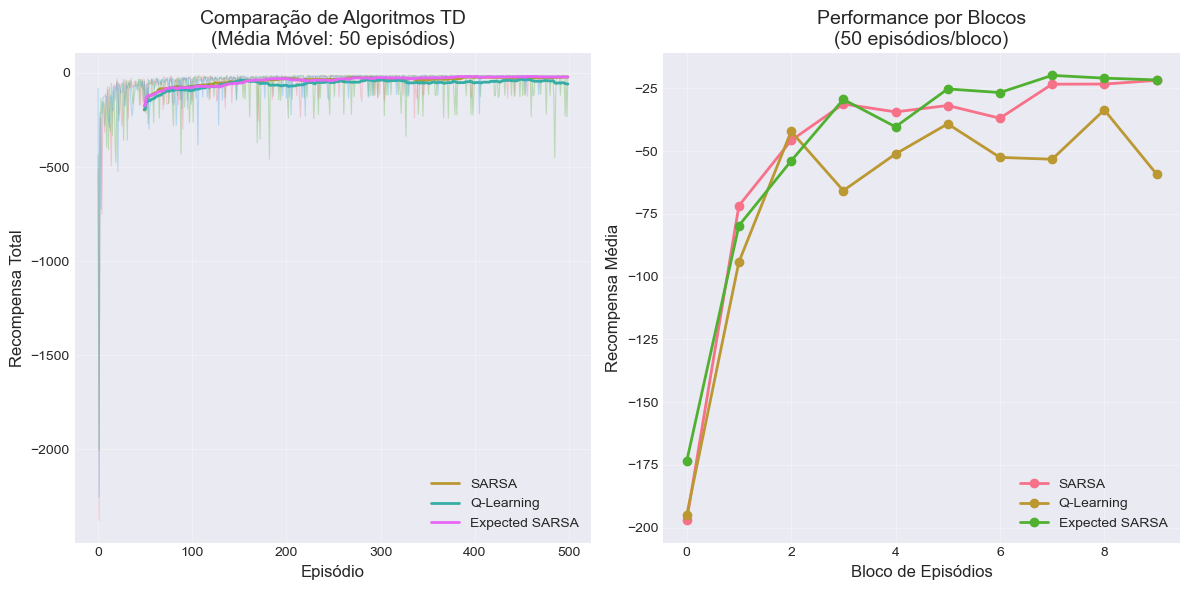


ESTATÍSTICAS DE PERFORMANCE

SARSA:
  Últimos 100 episódios - Média: -22.57, Std: 18.36
  Todos episódios - Média: -51.74, Min: -2377.00, Max: -15.00

Q-Learning:
  Últimos 100 episódios - Média: -46.36, Std: 68.88
  Todos episódios - Média: -68.58, Min: -2005.00, Max: -13.00

Expected SARSA:
  Últimos 100 episódios - Média: -21.29, Std: 24.23
  Todos episódios - Média: -49.12, Min: -2254.00, Max: -15.00


In [16]:
### 5.3 Comparação de Performance


# Comparar curvas de aprendizado
rewards_dict = {
    'SARSA': rewards_sarsa,
    'Q-Learning': rewards_qlearning,
    'Expected SARSA': rewards_expected_sarsa
}

plot_learning_curve(rewards_dict, window=50, 
                   title="Comparação de Algoritmos TD")


→ Gerando visualizações de Q-values...



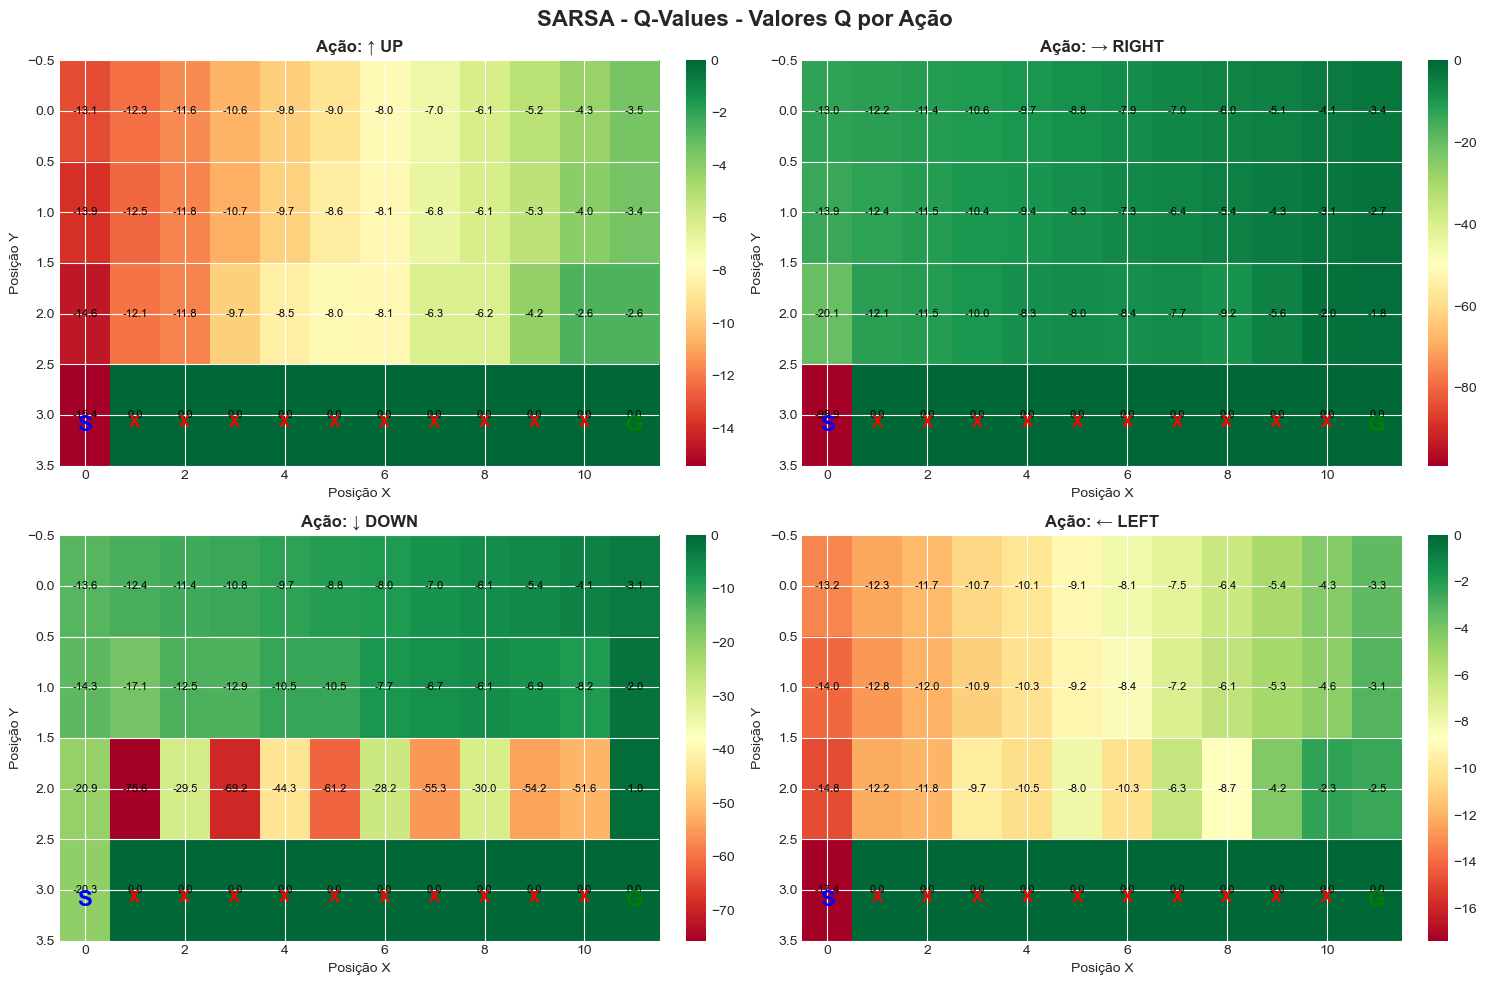

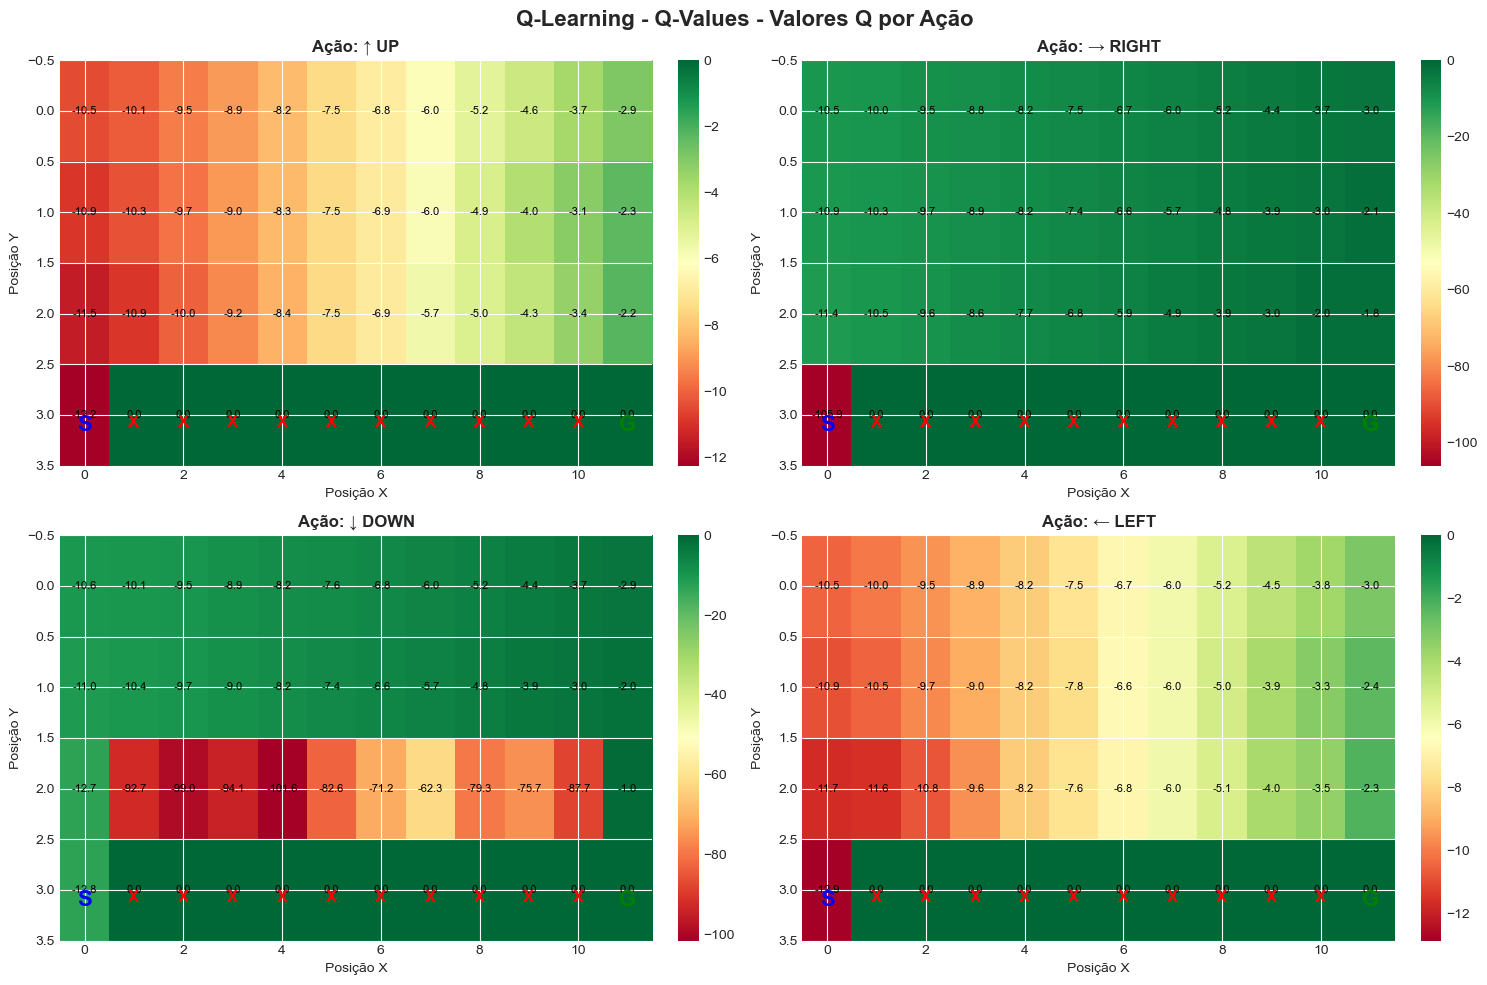

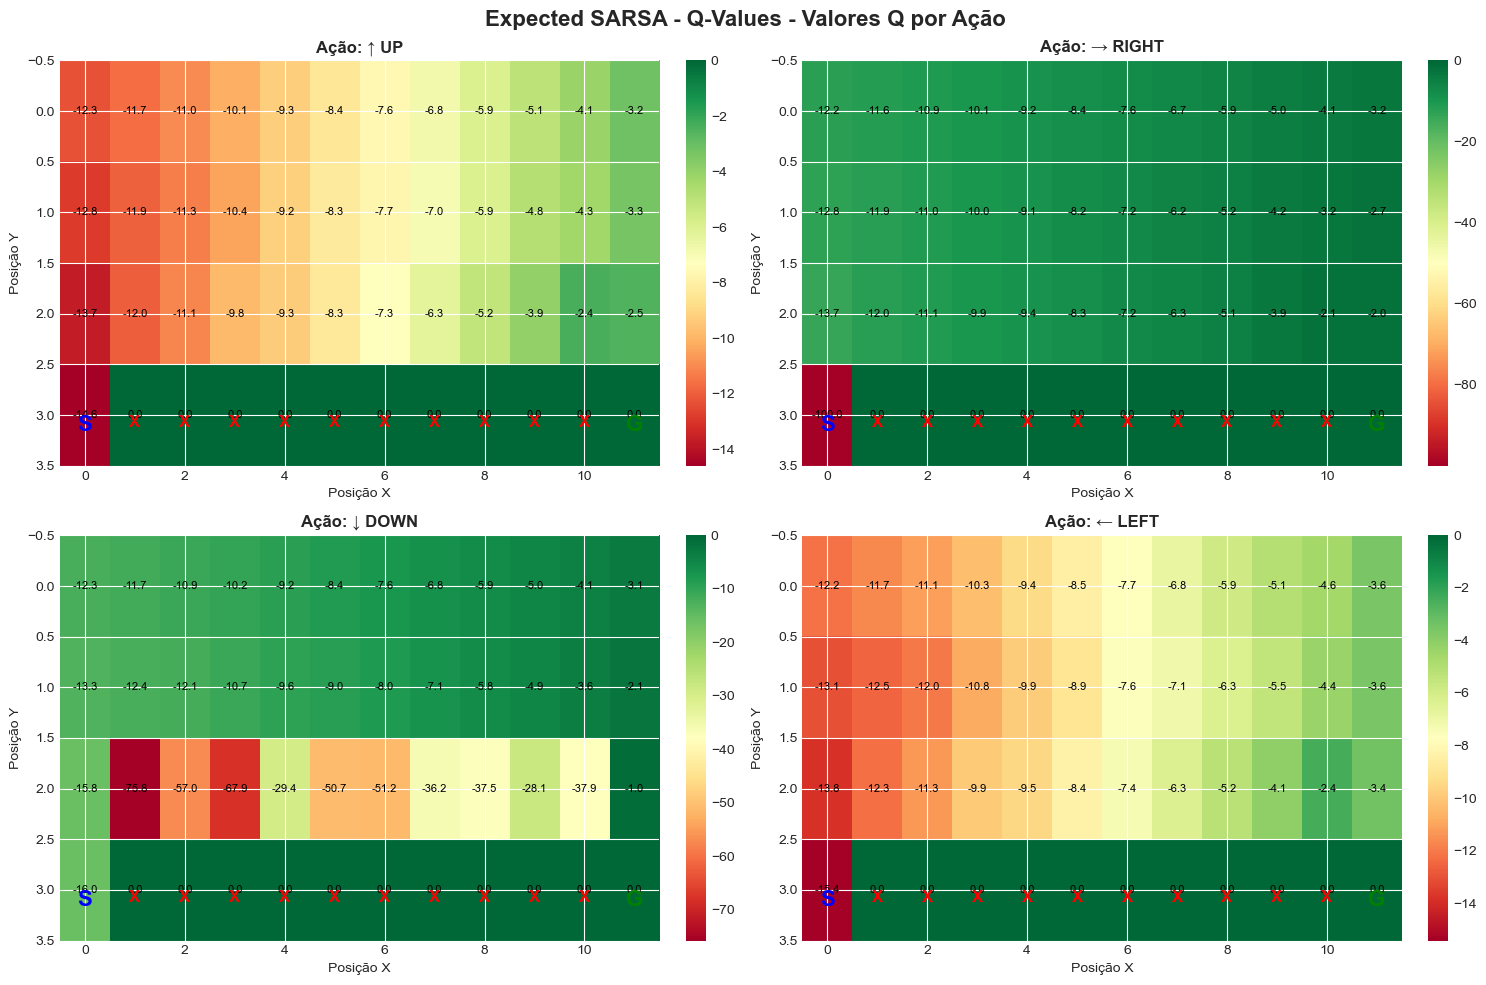

In [17]:
### 5.4 Visualização de Q-values


# Visualizar Q-values para cada algoritmo
print("\n→ Gerando visualizações de Q-values...\n")

plot_q_values_heatmap(Q_sarsa, title="SARSA - Q-Values")
plot_q_values_heatmap(Q_qlearning, title="Q-Learning - Q-Values")
plot_q_values_heatmap(Q_expected_sarsa, title="Expected SARSA - Q-Values")

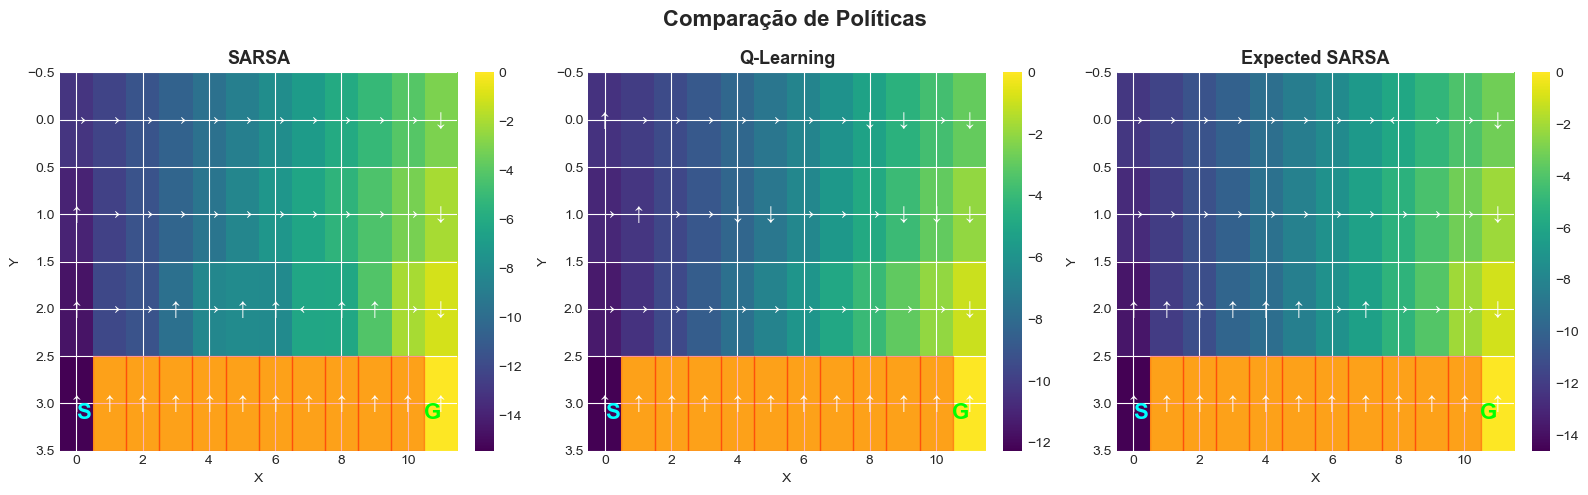


COMPARAÇÃO DE POLÍTICAS

SARSA vs Q-Learning:
  Estados com ações diferentes: 16/48 (33.3%)

SARSA vs Expected SARSA:
  Estados com ações diferentes: 9/48 (18.8%)

Q-Learning vs Expected SARSA:
  Estados com ações diferentes: 15/48 (31.2%)


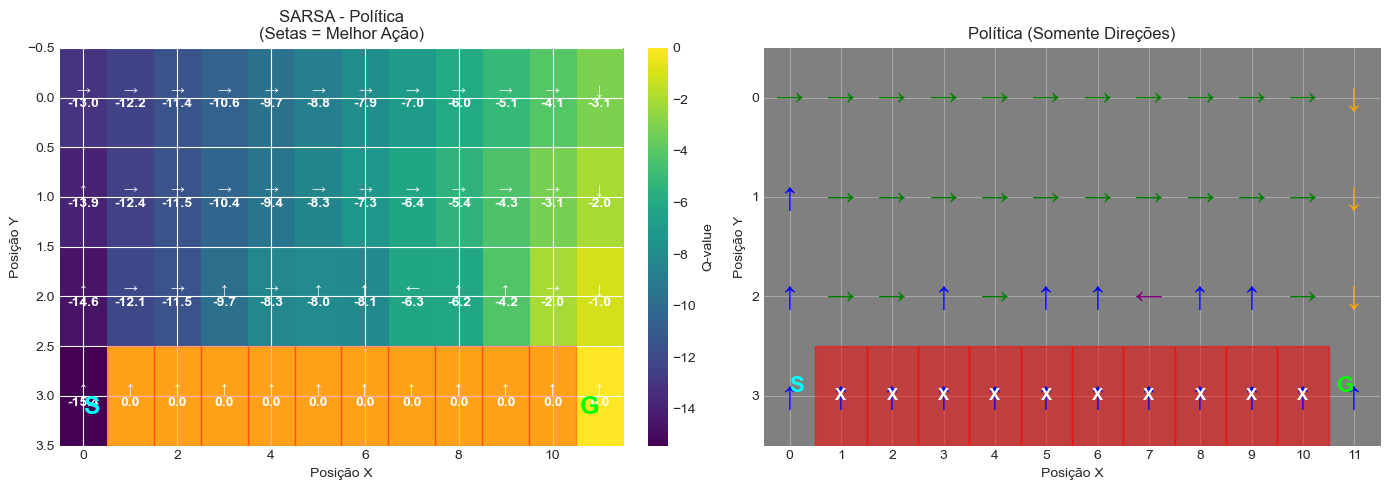


ANÁLISE DA POLÍTICA
Ação ↑: 19 estados (39.6%)
Ação →: 25 estados (52.1%)
Ação ↓: 3 estados (6.2%)
Ação ←: 1 estados (2.1%)


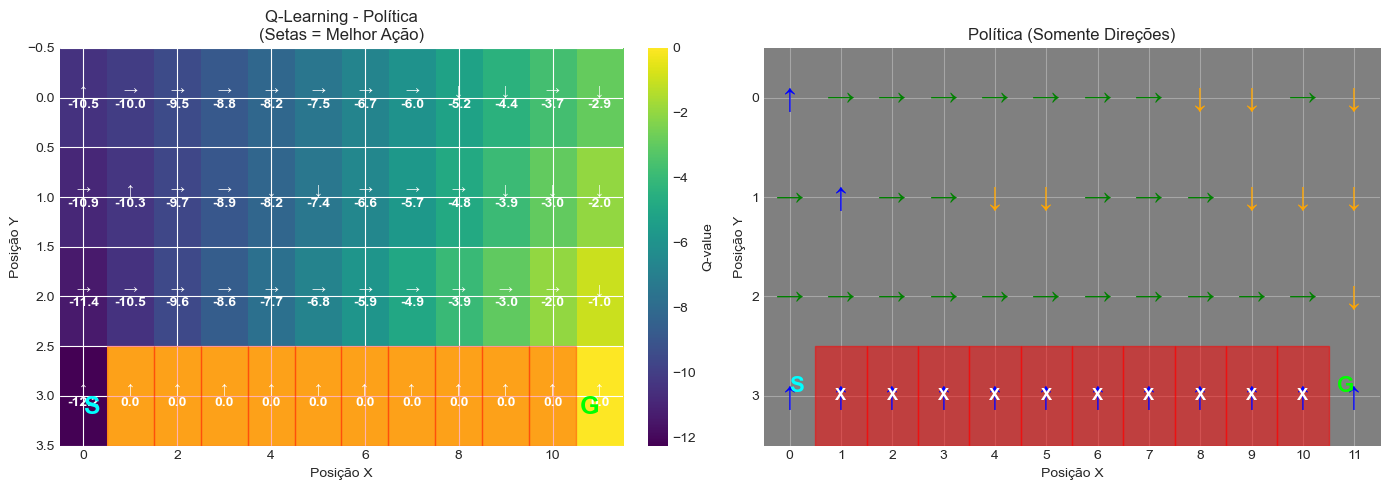


ANÁLISE DA POLÍTICA
Ação ↑: 14 estados (29.2%)
Ação →: 25 estados (52.1%)
Ação ↓: 9 estados (18.8%)
Ação ←: 0 estados (0.0%)


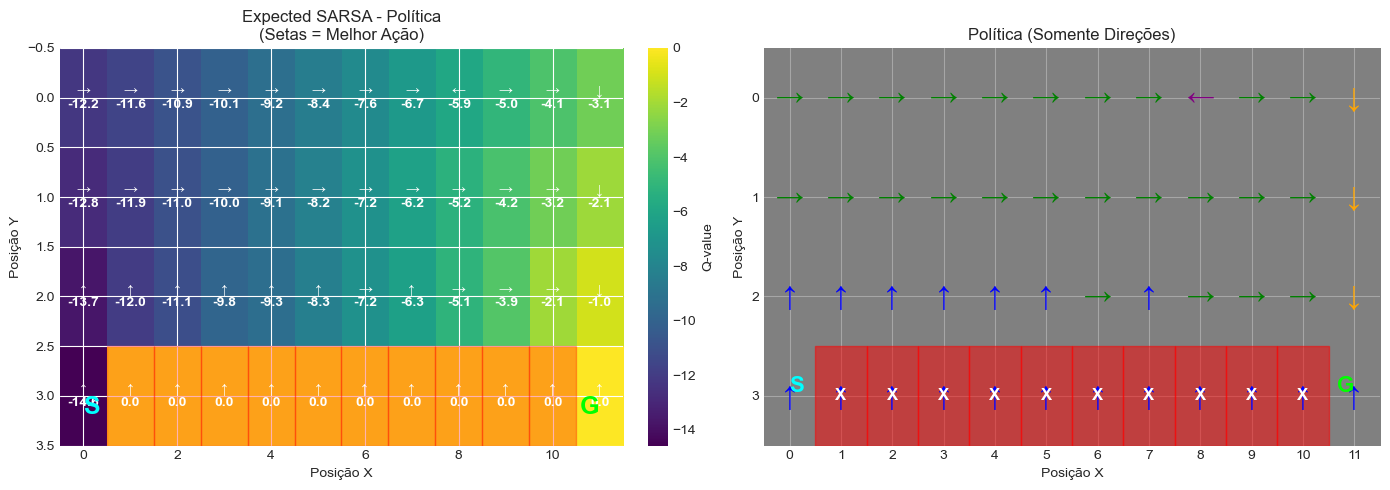


ANÁLISE DA POLÍTICA
Ação ↑: 19 estados (39.6%)
Ação →: 25 estados (52.1%)
Ação ↓: 3 estados (6.2%)
Ação ←: 1 estados (2.1%)


In [18]:
### 5.5 Visualização de Políticas


# Comparar políticas aprendidas
Q_dict = {
    'SARSA': Q_sarsa,
    'Q-Learning': Q_qlearning,
    'Expected SARSA': Q_expected_sarsa
}

compare_policies(Q_dict)

# Visualização detalhada de cada política
plot_policy_heatmap(Q_sarsa, title="SARSA - Política")
plot_policy_heatmap(Q_qlearning, title="Q-Learning - Política")
plot_policy_heatmap(Q_expected_sarsa, title="Expected SARSA - Política")


→ Simulando trajetórias...



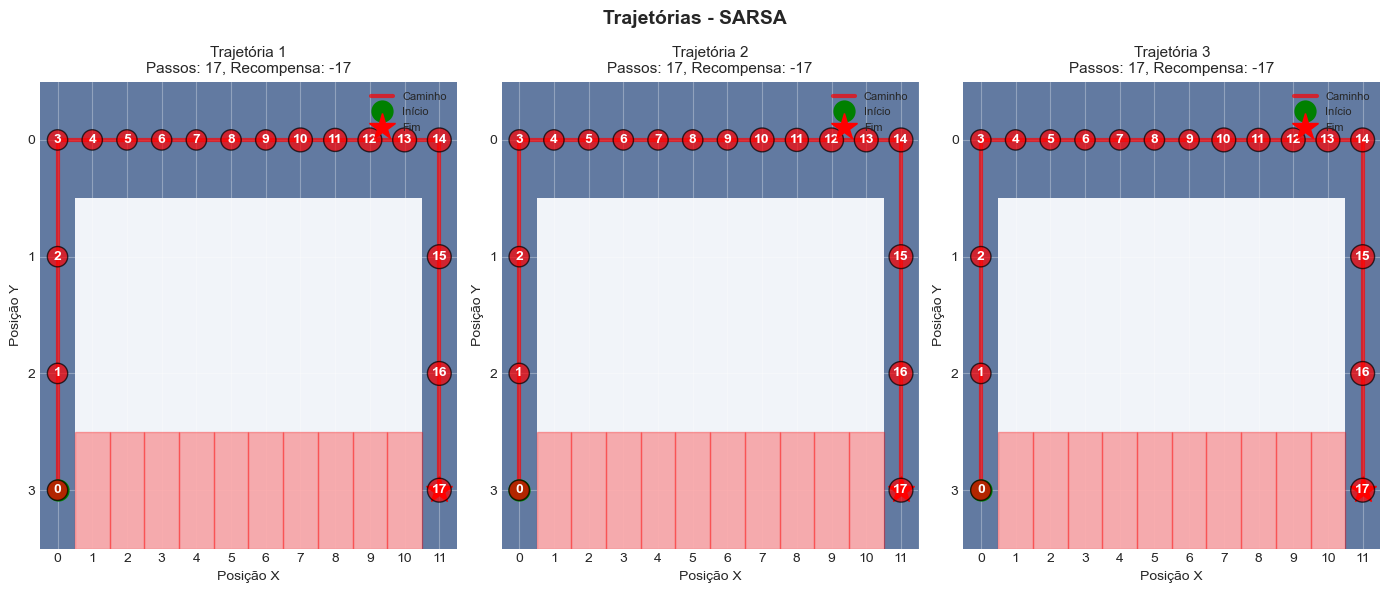


Trajetória executada com política greedy:
  Número de passos: 17
  Recompensa total: -17


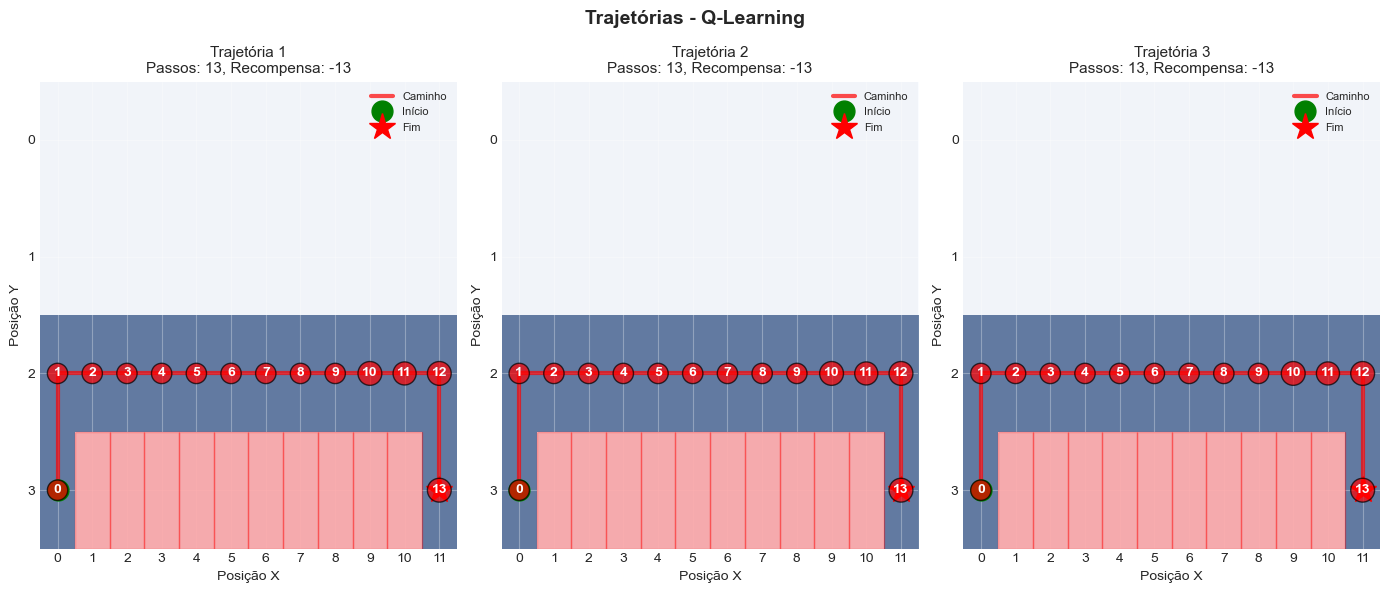


Trajetória executada com política greedy:
  Número de passos: 13
  Recompensa total: -13


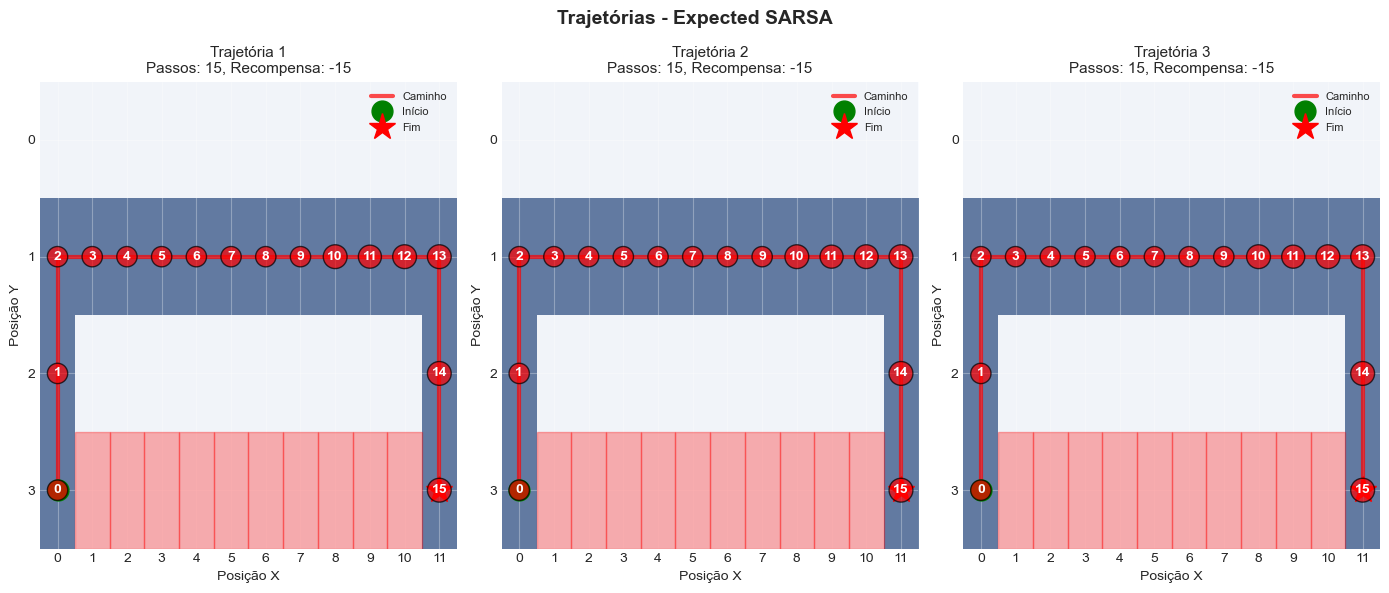


Trajetória executada com política greedy:
  Número de passos: 15
  Recompensa total: -15


In [19]:
### 5.6 Visualização de Trajetórias


# Simular trajetórias usando as políticas aprendidas
print("\n→ Simulando trajetórias...\n")

plot_trajectory(Q_sarsa, env, n_trajectories=3, 
               title="Trajetórias - SARSA")
plot_trajectory(Q_qlearning, env, n_trajectories=3, 
               title="Trajetórias - Q-Learning")
plot_trajectory(Q_expected_sarsa, env, n_trajectories=3, 
               title="Trajetórias - Expected SARSA")


ANÁLISE DE SENSIBILIDADE - ALPHA

ANÁLISE DE SENSIBILIDADE: ALPHA
Algoritmo: SARSA

Testando alpha = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -89.98

Testando alpha = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -27.64

Testando alpha = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -21.76

Testando alpha = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -24.86

Testando alpha = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -29.56

Testando alpha = 0.7...
  ✓ Recompensa final média (últimos 100 ep.): -37.93

Testando alpha = 1.0...
  ✓ Recompensa final média (últimos 100 ep.): -111.52



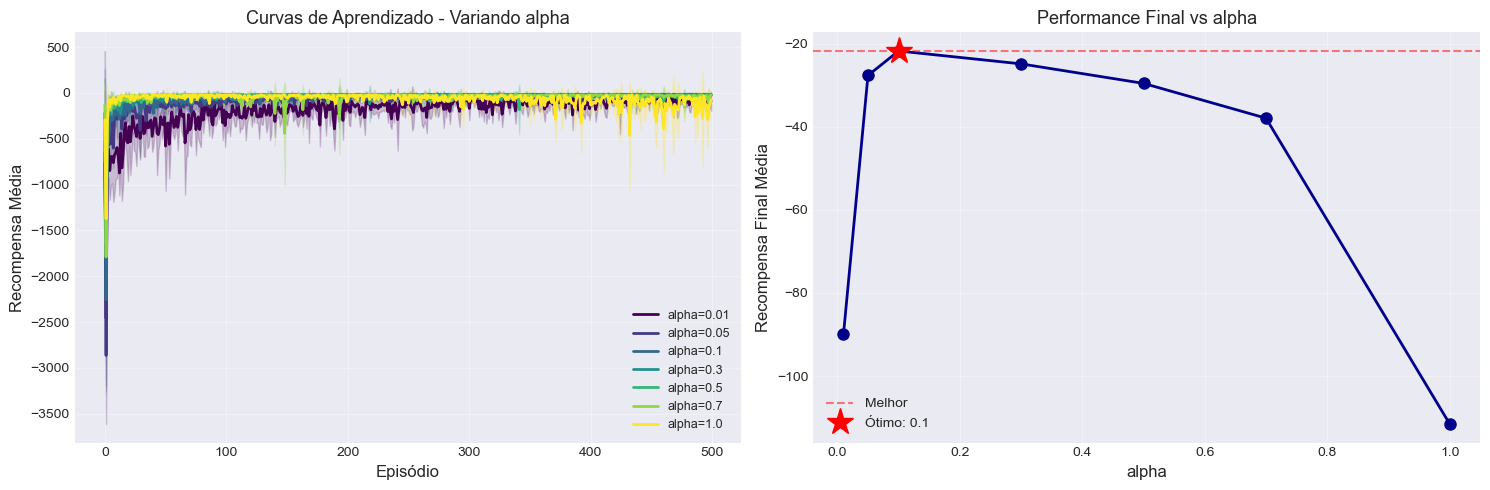


SUMÁRIO DA ANÁLISE
Melhor alpha: 0.1
Recompensa com melhor alpha: -21.76


ANÁLISE DE SENSIBILIDADE: ALPHA
Algoritmo: Q-Learning

Testando alpha = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -107.23

Testando alpha = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -47.82

Testando alpha = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -53.43

Testando alpha = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -54.56

Testando alpha = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -53.88

Testando alpha = 0.7...
  ✓ Recompensa final média (últimos 100 ep.): -51.56

Testando alpha = 1.0...
  ✓ Recompensa final média (últimos 100 ep.): -43.68



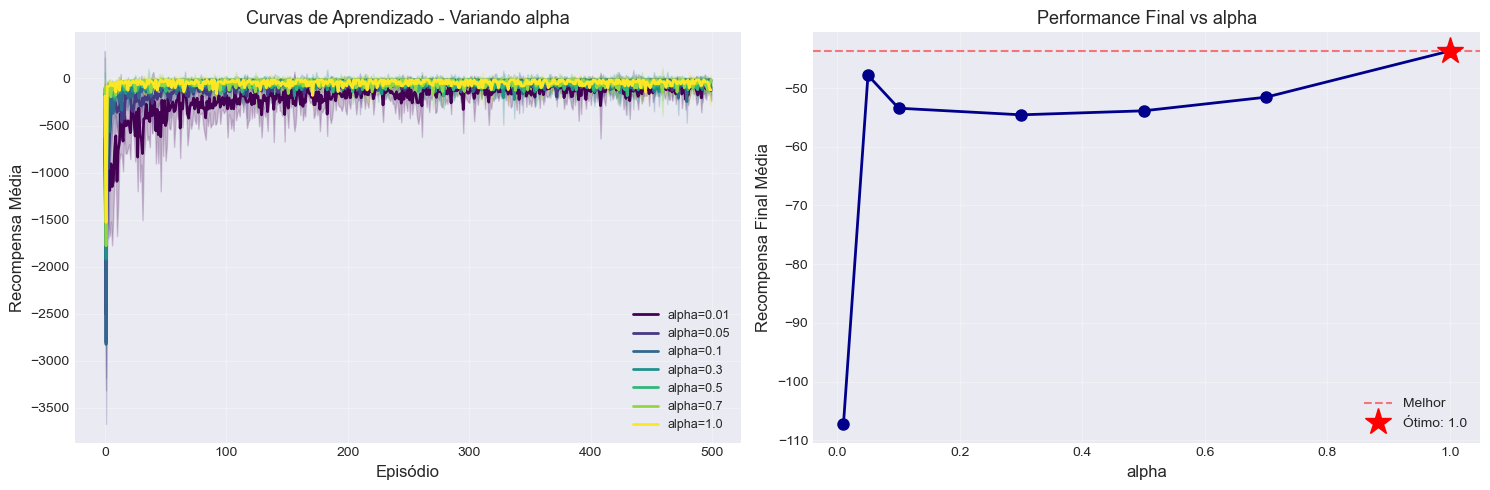


SUMÁRIO DA ANÁLISE
Melhor alpha: 1.0
Recompensa com melhor alpha: -43.68


ANÁLISE DE SENSIBILIDADE: ALPHA
Algoritmo: Expected SARSA

Testando alpha = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -92.11

Testando alpha = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -28.87

Testando alpha = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -20.61

Testando alpha = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -20.53

Testando alpha = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -21.10

Testando alpha = 0.7...
  ✓ Recompensa final média (últimos 100 ep.): -21.95

Testando alpha = 1.0...
  ✓ Recompensa final média (últimos 100 ep.): -21.39



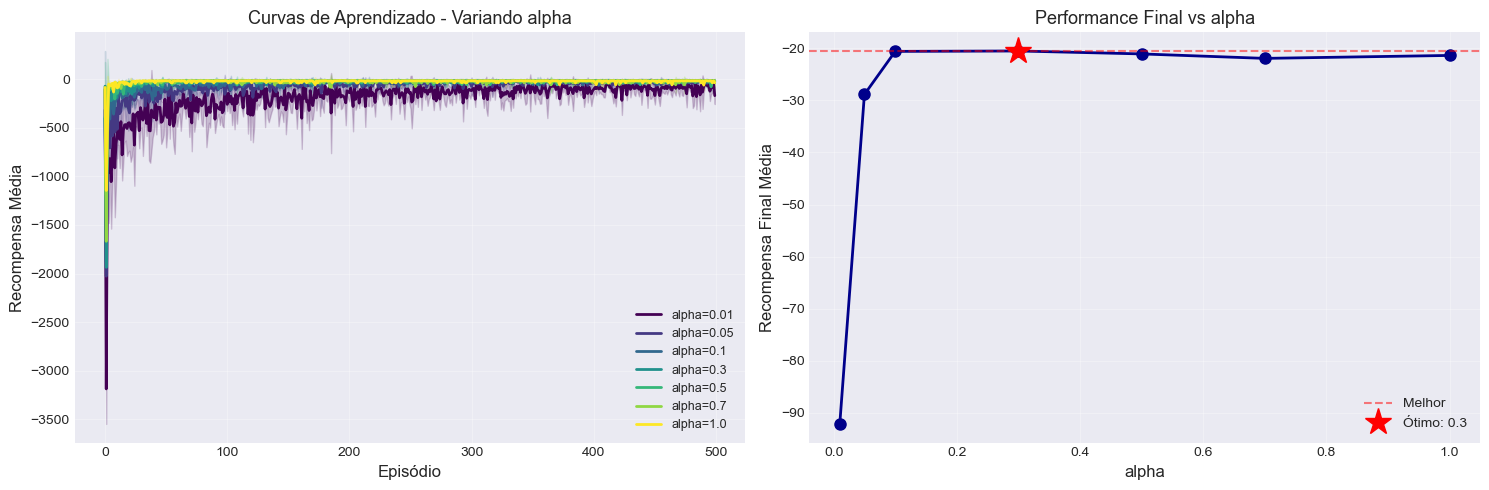


SUMÁRIO DA ANÁLISE
Melhor alpha: 0.3
Recompensa com melhor alpha: -20.53



In [20]:
### 5.7 Análise de Sensibilidade


# Exemplo 1: Análise do parâmetro alpha (taxa de aprendizado)
print("\n" + "="*70)
print("ANÁLISE DE SENSIBILIDADE - ALPHA")
print("="*70)

alpha_values = [0.01, 0.05, 0.1, 0.3, 0.5, 0.7, 1.0]

results_alpha_sarsa = parameter_sensitivity_analysis(
    env, sarsa, 'SARSA', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)

results_alpha_qlearning = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)

results_alpha_expected = parameter_sensitivity_analysis(
    env, expected_sarsa, 'Expected SARSA', 'alpha', alpha_values,
    n_episodes=500, n_runs=5
)


ANÁLISE DE SENSIBILIDADE - EPSILON

ANÁLISE DE SENSIBILIDADE: EPSILON
Algoritmo: SARSA

Testando epsilon = 0.0...
  ✓ Recompensa final média (últimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -17.21

Testando epsilon = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -19.96

Testando epsilon = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -22.92

Testando epsilon = 0.2...
  ✓ Recompensa final média (últimos 100 ep.): -30.84

Testando epsilon = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -42.22

Testando epsilon = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -91.45



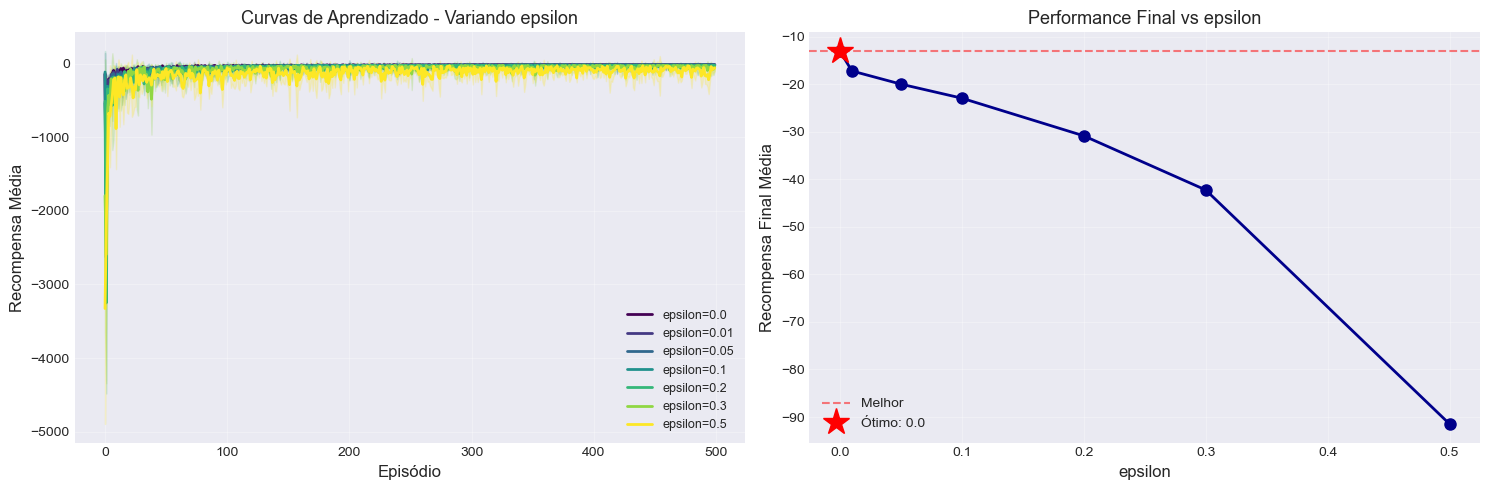


SUMÁRIO DA ANÁLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [21]:
# Exemplo 2: Análise do parâmetro epsilon (exploração)
print("\n" + "="*70)
print("ANÁLISE DE SENSIBILIDADE - EPSILON")
print("="*70)

epsilon_values = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]

results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, sarsa, 'SARSA', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


ANÁLISE DE SENSIBILIDADE: EPSILON
Algoritmo: E-SARSA

Testando epsilon = 0.0...
  ✓ Recompensa final média (últimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -17.55

Testando epsilon = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -19.28

Testando epsilon = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -21.55

Testando epsilon = 0.2...
  ✓ Recompensa final média (últimos 100 ep.): -30.24

Testando epsilon = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -43.77

Testando epsilon = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -88.93



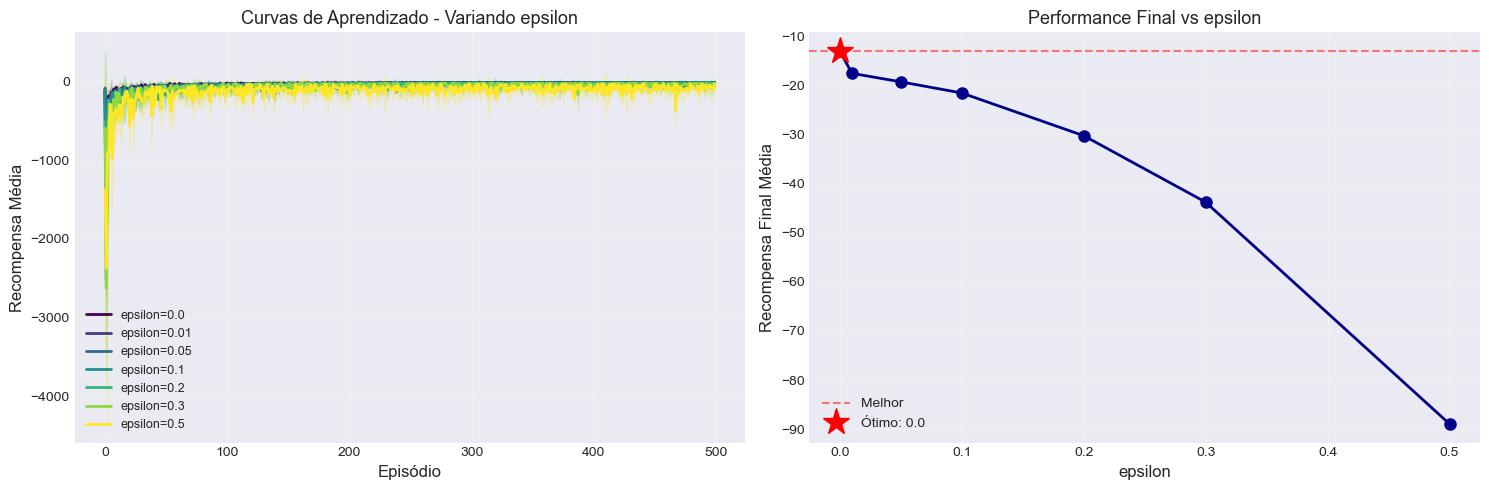


SUMÁRIO DA ANÁLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [23]:
results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, expected_sarsa, 'E-SARSA', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


ANÁLISE DE SENSIBILIDADE: EPSILON
Algoritmo: Q-Learning

Testando epsilon = 0.0...
  ✓ Recompensa final média (últimos 100 ep.): -13.00

Testando epsilon = 0.01...
  ✓ Recompensa final média (últimos 100 ep.): -16.66

Testando epsilon = 0.05...
  ✓ Recompensa final média (últimos 100 ep.): -28.90

Testando epsilon = 0.1...
  ✓ Recompensa final média (últimos 100 ep.): -42.57

Testando epsilon = 0.2...
  ✓ Recompensa final média (últimos 100 ep.): -94.73

Testando epsilon = 0.3...
  ✓ Recompensa final média (últimos 100 ep.): -174.52

Testando epsilon = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -393.42



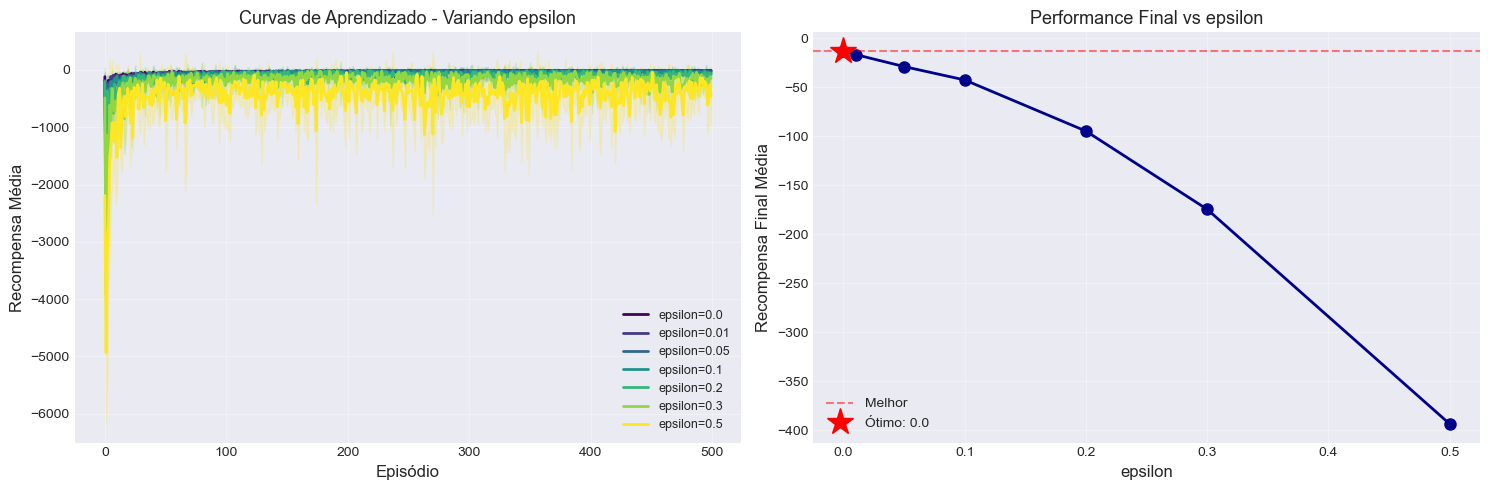


SUMÁRIO DA ANÁLISE
Melhor epsilon: 0.0
Recompensa com melhor epsilon: -13.00



In [24]:
results_epsilon_sarsa = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'epsilon', epsilon_values,
    n_episodes=500, n_runs=5
)


ANÁLISE DE SENSIBILIDADE - GAMMA

ANÁLISE DE SENSIBILIDADE: GAMMA
Algoritmo: Q-Learning

Testando gamma = 0.5...
  ✓ Recompensa final média (últimos 100 ep.): -51.88

Testando gamma = 0.7...
  ✓ Recompensa final média (últimos 100 ep.): -48.37

Testando gamma = 0.9...
  ✓ Recompensa final média (últimos 100 ep.): -50.37

Testando gamma = 0.95...
  ✓ Recompensa final média (últimos 100 ep.): -47.33

Testando gamma = 0.99...
  ✓ Recompensa final média (últimos 100 ep.): -51.86

Testando gamma = 0.999...
  ✓ Recompensa final média (últimos 100 ep.): -50.98



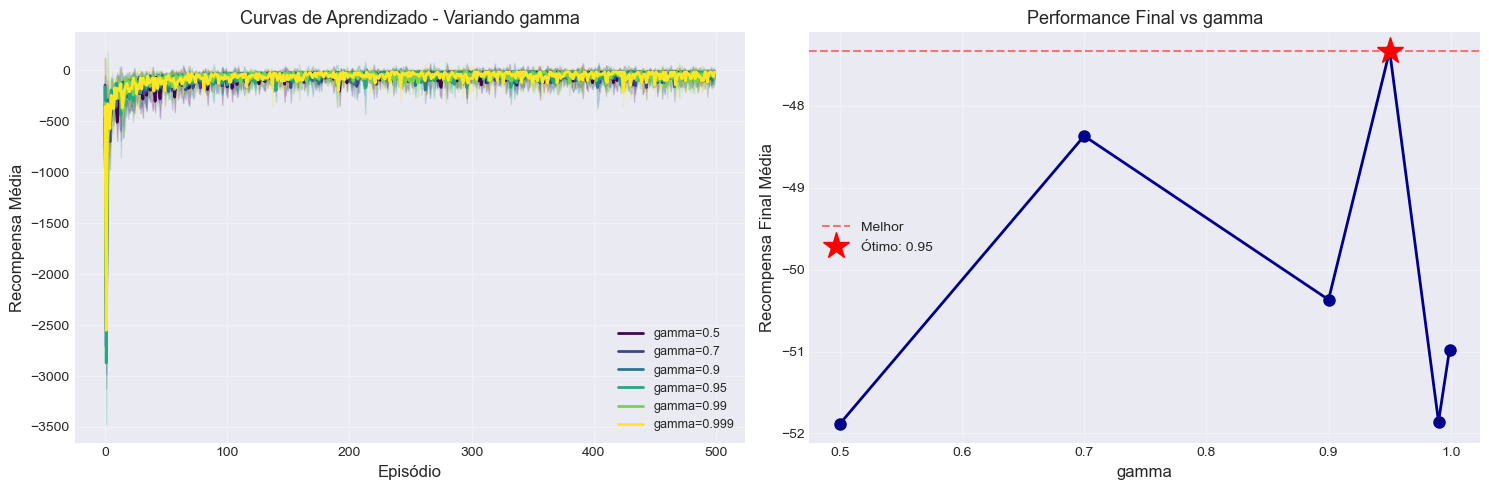


SUMÁRIO DA ANÁLISE
Melhor gamma: 0.95
Recompensa com melhor gamma: -47.33



In [25]:
# Exemplo 3: Análise do parâmetro gamma (desconto)
print("\n" + "="*70)
print("ANÁLISE DE SENSIBILIDADE - GAMMA")
print("="*70)

gamma_values = [0.5, 0.7, 0.9, 0.95, 0.99, 0.999]

results_gamma_qlearning = parameter_sensitivity_analysis(
    env, q_learning, 'Q-Learning', 'gamma', gamma_values,
    n_episodes=500, n_runs=5
)


ANÁLISE DE SENSIBILIDADE - Q_INIT (Inicialização Otimista)

ANÁLISE DE SENSIBILIDADE: Q_INIT
Algoritmo: Expected SARSA

Testando q_init = -10.0...
  ✓ Recompensa final média (últimos 100 ep.): -22.93

Testando q_init = -5.0...
  ✓ Recompensa final média (últimos 100 ep.): -22.79

Testando q_init = 0.0...
  ✓ Recompensa final média (últimos 100 ep.): -20.76

Testando q_init = 5.0...
  ✓ Recompensa final média (últimos 100 ep.): -22.77

Testando q_init = 10.0...
  ✓ Recompensa final média (últimos 100 ep.): -21.33

Testando q_init = 20.0...
  ✓ Recompensa final média (últimos 100 ep.): -22.31



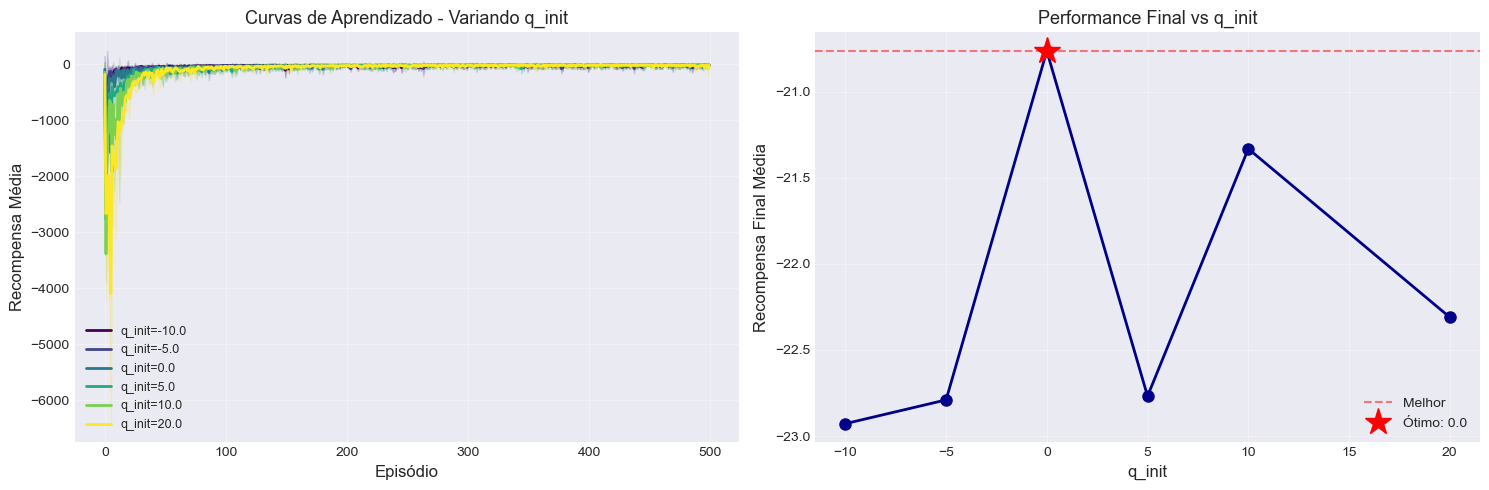


SUMÁRIO DA ANÁLISE
Melhor q_init: 0.0
Recompensa com melhor q_init: -20.76



In [26]:
# Exemplo 4: Análise do valor inicial Q(s,a)
print("\n" + "="*70)
print("ANÁLISE DE SENSIBILIDADE - Q_INIT (Inicialização Otimista)")
print("="*70)

q_init_values = [-10.0, -5.0, 0.0, 5.0, 10.0, 20.0]

results_qinit_expected = parameter_sensitivity_analysis(
    env, expected_sarsa, 'Expected SARSA', 'q_init', q_init_values,
    n_episodes=500, n_runs=5
)

## 6. Discussão dos Resultados

### 6.1 Comportamento Esperado no Cliff Walking

**SARSA (On-Policy):**
- Aprende um caminho **seguro** pela linha superior do grid
- Durante o aprendizado, ocasionalmente cai no precipício devido à exploração ε
- Como é on-policy, leva em conta essas quedas na atualização dos Q-values
- Resultado: aprende a **evitar** o precipício, mesmo que isso signifique um caminho mais longo
- Performance interina: **melhor** que Q-Learning (menos quedas)
- Performance assintótica: **subótima** mas segura

**Q-Learning (Off-Policy):**
- Aprende o caminho **ótimo** (mais curto) ao longo da borda do precipício
- Durante o aprendizado, cai no precipício com frequência devido à exploração
- Como é off-policy, sempre atualiza considerando a melhor ação (ignorando exploração)
- Resultado: aprende o caminho ótimo, mas **perigoso** durante treinamento
- Performance interina: **pior** que SARSA (muitas quedas)
- Performance assintótica: **ótima**

**Expected SARSA:**
- Aprende o caminho **ótimo** como Q-Learning
- Durante o aprendizado, tem performance **intermediária**
- Usa expectativa sobre ações, reduzindo variância
- Resultado: **melhor de ambos** - aprende ótimo com menos quedas
- Performance interina: **melhor** que ambos
- Performance assintótica: **ótima**
- **Mais estável** com diferentes valores de α

---

### 6.2 Efeitos dos Hiperparâmetros

#### 6.2.1 Taxa de Aprendizado (α)

**Efeito:**
- **α pequeno (0.01-0.05)**: Aprendizado lento mas estável, requer muitos episódios
- **α médio (0.1-0.3)**: Bom balanço entre velocidade e estabilidade
- **α grande (0.5-1.0)**: Aprendizado rápido mas pode oscilar

**Observações por algoritmo:**
- **SARSA**: Sensível a α alto (pode instabilizar)
- **Q-Learning**: Similar ao SARSA
- **Expected SARSA**: Tolera α maior (até 1.0) sem instabilidade - **vantagem importante!**

**Recomendação:**
- Comece com α = 0.1
- Para Expected SARSA, pode usar α = 0.5 ou maior
- Em ambientes determinísticos, Expected SARSA com α = 1.0 pode funcionar bem

#### 6.2.2 Fator de Desconto (γ)

**Efeito:**
- **γ baixo (0.5-0.7)**: Agente míope, foca em recompensas imediatas
- **γ alto (0.9-0.99)**: Agente valoriza recompensas futuras, planeja melhor
- **γ muito alto (0.999)**: Pode dificultar convergência

**No Cliff Walking:**
- γ baixo: pode não aprender a evitar precipício adequadamente
- γ alto: aprende melhor a estratégia completa até o objetivo
- Valor típico recomendado: **0.99**

#### 6.2.3 Exploração (ε)

**Efeito:**
- **ε = 0** (greedy): Sem exploração, pode ficar preso em ótimo local
- **ε pequeno (0.01-0.05)**: Pouca exploração, convergência rápida mas pode perder ótimo global
- **ε médio (0.1-0.2)**: Bom balanço exploração/exploitation
- **ε grande (0.3-0.5)**: Muita exploração, aprendizado lento

**Estratégia comum:**
- Usar **ε-decay**: começar com ε alto (0.3) e decair para ε baixo (0.01)
- No Cliff Walking, ε = 0.1 funciona bem

**Diferença entre algoritmos:**
- **SARSA**: Mais sensível a ε (afeta diretamente a política aprendida)
- **Q-Learning**: Menos sensível a ε (off-policy)
- **Expected SARSA**: Incorpora ε na expectativa

#### 6.2.4 Inicialização Otimista (q_init)

**Efeito:**
- **q_init = 0**: Padrão, sem viés inicial
- **q_init > 0** (otimista): Encoraja exploração inicial (estados não visitados parecem promissores)
- **q_init < 0** (pessimista): Desencoraja exploração

**Uso:**
- Inicialização otimista (q_init = 5 a 10) pode **acelerar exploração** inicial
- Útil quando ε é baixo
- No Cliff Walking: q_init = 0 funciona bem (exploração já controlada por ε)

---

## 7. Dicas Práticas e Troubleshooting

### 7.1 Escolha do Algoritmo

```python
"""
GUIA DE ESCOLHA:

Use SARSA quando:
✓ Segurança durante aprendizado é CRÍTICA
✓ Custo de falhas é alto (robótica, sistemas reais)
✓ Prefere política conservadora
✓ Exploração pode ser perigosa

Use Q-Learning quando:
✓ Quer descobrir política ÓTIMA
✓ Pode tolerar performance ruim no início
✓ Ambiente é simulação/jogo
✓ Simplicidade conceitual importa

Use Expected SARSA quando:
✓ Quer MELHOR performance geral (recomendado!)
✓ Pode arcar com custo computacional O(|A|)
✓ Estabilidade é importante
✓ Maioria dos casos práticos
"""
```

### 7.2 Problemas Comuns

```python
"""
PROBLEMA 1: Q-values não convergem, oscilam muito
SOLUÇÃO:
- Reduzir α (taxa de aprendizado)
- Aumentar número de episódios
- Verificar se ambiente é estocástico demais

PROBLEMA 2: Agente fica preso em ótimo local
SOLUÇÃO:
- Aumentar ε (mais exploração)
- Usar inicialização otimista (q_init > 0)
- Aumentar número de episódios

PROBLEMA 3: Aprendizado muito lento
SOLUÇÃO:
- Aumentar α (com cuidado para não instabilizar)
- Verificar se γ não está muito baixo
- Considerar usar Expected SARSA (mais eficiente)

PROBLEMA 4: Performance assintótica ruim
SOLUÇÃO:
- Verificar se ε não está muito alto (reduzir ε no final)
- Aumentar γ (considerar recompensas futuras)
- Treinar por mais episódios

PROBLEMA 5: SARSA vs Q-Learning dão resultados iguais
SOLUÇÃO:
- Isso pode acontecer se ε for muito baixo
- Aumente ε para ver diferença de comportamento
- Em ambientes determinísticos, podem convergir para o mesmo
"""
```

### 7.3 Boas Práticas

```python
"""
BOAS PRÁTICAS:

1. SEMPRE plotar curvas de aprendizado
   - Identifica problemas de convergência
   - Mostra se algoritmo está melhorando

2. Usar média móvel para suavizar gráficos
   - Facilita visualização de tendências
   - Window = 50 a 100 episódios

3. Executar múltiplas vezes (seeds diferentes)
   - Calcula média e desvio padrão
   - Resultados mais confiáveis

4. Começar com valores padrão
   - α = 0.1, γ = 0.99, ε = 0.1
   - Depois fazer análise de sensibilidade

5. Visualizar Q-values e política
   - Entender o que o agente aprendeu
   - Debugar comportamentos estranhos

6. Testar política sem exploração (ε = 0)
   - Ver performance real da política aprendida
   - Separar efeito da exploração

7. Comparar com baseline
   - Política aleatória
   - Política manual (se disponível)
"""
```

---

## 8. Extensões e Experimentos Avançados

### 8.1 ε-Decay (Exploração Decrescente)

```python
def sarsa_with_epsilon_decay(env: gym.Env,
                             n_episodes: int = 500,
                             alpha: float = 0.1,
                             gamma: float = 0.99,
                             epsilon_start: float = 1.0,
                             epsilon_end: float = 0.01,
                             epsilon_decay: float = 0.995,
                             q_init: float = 0.0) -> Tuple[np.ndarray, List[float], List[float]]:
    """
    SARSA com decaimento de epsilon ao longo do treinamento.
    
    Estratégia: Explorar muito no início, explorar pouco no final.
    
    Retorna:
    --------
    Tuple[np.ndarray, List[float], List[float]]
        - Q: Tabela Q aprendida
        - episode_rewards: Recompensas por episódio
        - epsilon_history: Valores de epsilon ao longo do tempo
    """
    n_actions = env.action_space.n
    n_states = env.observation_space.n
    Q = np.full((n_states, n_actions), q_init, dtype=np.float64)
    
    episode_rewards = []
    epsilon_history = []
    epsilon = epsilon_start
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon, n_actions)
        
        total_reward = 0
        done = False
        
        while not done:
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            
            if not done:
                next_action = epsilon_greedy_policy(Q, next_state, epsilon, n_actions)
                td_target = reward + gamma * Q[next_state, next_action]
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
                state, action = next_state, next_action
            else:
                td_target = reward
                td_error = td_target - Q[state, action]
                Q[state, action] += alpha * td_error
        
        episode_rewards.append(total_reward)
        epsilon_history.append(epsilon)
        
        # Decair epsilon
        epsilon = max(epsilon_end, epsilon * epsilon_decay)
    
    return Q, episode_rewards, epsilon_history


# Exemplo de uso:
# Q, rewards, eps_hist = sarsa_with_epsilon_decay(env, n_episodes=1000)
# 
# # Plotar epsilon ao longo do tempo
# plt.figure(figsize=(10, 4))
# plt.plot(eps_hist)
# plt.xlabel('Episódio')
# plt.ylabel('Epsilon')
# plt.title('Decaimento de Epsilon')
# plt.grid(True)
# plt.show()
```

### 8.2 Comparação com Política Aleatória (Baseline)

```python
def random_policy_baseline(env: gym.Env, 
                          n_episodes: int = 100) -> List[float]:
    """
    Avalia performance de uma política completamente aleatória.
    Serve como baseline para comparação.
    """
    episode_rewards = []
    
    for episode in range(n_episodes):
        state, _ = env.reset()
        total_reward = 0
        done = False
        
        while not done:
            action = env.action_space.sample()  # Ação aleatória
            next_state, reward, terminated, truncated, _ = env.step(action)
            done = terminated or truncated
            total_reward += reward
            state = next_state
        
        episode_rewards.append(total_reward)
    
    return episode_rewards


# Exemplo de uso:
# random_rewards = random_policy_baseline(env, n_episodes=500)
# 
# # Comparar com algoritmos treinados
# plt.figure(figsize=(12, 6))
# plt.plot(random_rewards, label='Política Aleatória', alpha=0.5)
# plt.plot(rewards_sarsa, label='SARSA', alpha=0.7)
# plt.plot(rewards_qlearning, label='Q-Learning', alpha=0.7)
# plt.xlabel('Episódio')
# plt.ylabel('Recompensa Total')
# plt.title('Comparação com Baseline Aleatório')
# plt.legend()
# plt.grid(True)
# plt.show()
# 
# print(f"Política Aleatória - Média: {np.mean(random_rewards):.2f}")
# print(f"SARSA - Média: {np.mean(rewards_sarsa[-100:]):.2f}")
# print(f"Q-Learning - Média: {np.mean(rewards_qlearning[-100:]):.2f}")
```

### 8.3 Análise de Convergência

```python
def analyze_convergence(Q_history: List[np.ndarray],
                       window: int = 10) -> Dict:
    """
    Analisa a convergência da tabela Q ao longo do treinamento.
    
    Requer modificar os algoritmos para salvar Q a cada N episódios.
    
    Retorna métricas de convergência:
    - Delta médio (mudança em Q)
    - Número de estados com Q estável
    """
    deltas = []
    
    for i in range(1, len(Q_history)):
        delta = np.mean(np.abs(Q_history[i] - Q_history[i-1]))
        deltas.append(delta)
    
    # Suavizar com média móvel
    if len(deltas) >= window:
        smoothed_deltas = np.convolve(deltas, np.ones(window)/window, mode='valid')
    else:
        smoothed_deltas = deltas
    
    # Plotar
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(deltas, alpha=0.3, label='Delta bruto')
    plt.plot(range(window-1, len(deltas)), smoothed_deltas, 
            label=f'Média móvel (janela={window})', linewidth=2)
    plt.xlabel('Checkpoint')
    plt.ylabel('|Q_t - Q_{t-1}| médio')
    plt.title('Convergência da Tabela Q')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.yscale('log')
    
    plt.subplot(1, 2, 2)
    final_Q = Q_history[-1]
    plt.hist(final_Q.flatten(), bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel('Q-value')
    plt.ylabel('Frequência')
    plt.title('Distribuição de Q-values Finais')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    return {
        'deltas': deltas,
        'final_mean_delta': deltas[-1] if deltas else 0,
        'converged': deltas[-1] < 0.01 if deltas else False
    }
```

---

## 9. Resumo e Conclusões

### 9.1 Principais Aprendizados

**Sobre os Algoritmos:**

1. **SARSA** é ideal quando segurança importa mais que otimalidade
2. **Q-Learning** é ideal quando você quer a política ótima e pode tolerar falhas durante treinamento
3. **Expected SARSA** é geralmente a melhor escolha: combina estabilidade e otimalidade

**Sobre os Hiperparâmetros:**

1. **α (learning rate)**: Comece com 0.1, Expected SARSA tolera valores maiores
2. **γ (discount)**: Use 0.99 para a maioria dos problemas
3. **ε (exploration)**: Use 0.1, considere ε-decay para problemas complexos
4. **Inicialização**: q_init = 0 funciona bem, valores otimistas podem acelerar exploração

**Sobre o Cliff Walking:**

1. SARSA aprende caminho seguro (linha superior)
2. Q-Learning e Expected SARSA aprendem caminho ótimo (beirando cliff)
3. Expected SARSA tem melhor performance durante treinamento

### 9.2 Equações-Chave

**SARSA:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)]$

**Q-Learning:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \max_a Q(S_{t+1}, a) - Q(S_t, A_t)]$

**Expected SARSA:**
$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma \sum_a \pi(a|S_{t+1}) Q(S_{t+1}, a) - Q(S_t, A_t)]$

### 9.3 Quando Usar Cada Método

| Critério | SARSA | Q-Learning | Expected SARSA |
|----------|-------|------------|----------------|
| **Segurança** | ⭐⭐⭐⭐⭐ | ⭐⭐ | ⭐⭐⭐⭐ |
| **Otimalidade** | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Estabilidade** | ⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐⭐⭐ |
| **Velocidade** | ⭐⭐⭐⭐ | ⭐⭐⭐ | ⭐⭐⭐ |
| **Simplicidade** | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐ | ⭐⭐⭐ |

---

## 10. Referências

### Bibliográficas

1. **Sutton, R. S., & Barto, A. G. (2020).** *Reinforcement Learning: An Introduction* (2nd ed.). MIT Press.
   - Capítulo 6: Temporal-Difference Learning
   - Seção 6.6: Expected SARSA

2. **Watkins, C. J. C. H. (1989).** Learning from Delayed Rewards. PhD Thesis, Cambridge University.

3. **Van Seijen, H., et al. (2009).** A theoretical and empirical analysis of Expected Sarsa. IEEE Symposium on Adaptive Dynamic Programming and Reinforcement Learning.

4. **Rummery, G. A., & Niranjan, M. (1994).** On-line Q-learning using connectionist systems. Technical Report, Cambridge University.

### Links Úteis

- **Gymnasium (OpenAI Gym)**: https://gymnasium.farama.org/
- **Sutton & Barto Book**: http://incompleteideas.net/book/the-book-2nd.html
- **David Silver's RL Course**: https://www.davidsilver.uk/teaching/
- **Spinning Up in Deep RL (OpenAI)**: https://spinningup.openai.com/

---

## Apêndice: Checklist de Experimentação

```markdown
CHECKLIST PARA EXPERIMENTAÇÃO:

□ Ambiente configurado corretamente
□ Parâmetros padrão definidos (α=0.1, γ=0.99, ε=0.1)
□ Treinar os 3 algoritmos com mesmos parâmetros
□ Plotar curvas de aprendizado comparativas
□ Visualizar Q-values de cada algoritmo
□ Visualizar políticas aprendidas
□ Comparar políticas (diferenças entre algoritmos)
□ Simular trajetórias (verificar comportamento)
□ Análise de sensibilidade de α
□ Análise de sensibilidade de ε
□ Análise de sensibilidade de γ
□ (Opcional) Testar ε-decay
□ (Opcional) Comparar com baseline aleatório
□ (Opcional) Análise de convergência
□ Documentar resultados e observações
□ Concluir qual algoritmo é melhor para o problema
```

---

**FIM DO NOTEBOOK**

---

### Notas Finais

Este notebook fornece uma implementação completa e didática dos três principais algoritmos de Diferença Temporal para aprendizado por reforço. As funções são modulares e permitem fácil experimentação com diferentes hiperparâmetros.

**Para usar este material:**
1. Copie o código para um Jupyter Notebook
2. Execute as células sequencialmente
3. Experimente modificar os parâmetros
4. Analise os resultados visuais
5. Compare os comportamentos dos algoritmos

**Pontos de atenção:**
- Certifique-se de ter todas as bibliotecas instaladas (`pip install gymnasium numpy matplotlib seaborn`)
- Os gráficos podem levar alguns segundos para serem gerados
- Para análises de sensibilidade com muitos runs, considere usar menos episódios inicialmente
- Salve seus Q-tables se quiser reutilizar políticas treinadas

Boa sorte com seus experimentos em Reinforcement Learning! 🚀